## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sys
import string
import gensim
from gensim.models import KeyedVectors
from collections import  Counter
import spacy
from operator import itemgetter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## Reading the Data

In [2]:
data = pd.read_csv("Comments.csv")
data.head(5)

,COMMENT
0,Realizing that they are in the power supply bu...
1,"Futuri has grown employment by a huge amount, ..."
2,assistance for DBO's
3,The market is shifting and we aren't adapting....
4,Quicker growth and store openings so people wi...


## Shape of the Data

In [3]:
data.shape

(98589, 1)

## Information of the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98589 entries, 0 to 98588
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COMMENT  98589 non-null  object
dtypes: object(1)
memory usage: 770.4+ KB


## Describing the Data

In [5]:
data.describe()

,COMMENT
count,98589
unique,91074
top,none
freq,526


## Columns present in the Data

In [6]:
data.columns

Index(['COMMENT'], dtype='object')

## Null Values

In [7]:
data.isnull()

,COMMENT
0,False
1,False
2,False
3,False
4,False
...,...
98584,False
98585,False
98586,False
98587,False


## Sum of the Null values

In [8]:
data.isnull().sum()

COMMENT    0
dtype: int64

## Replacing and Dropping nan values

In [9]:
data.replace(' ', np.nan, inplace=True)
data=data.dropna(how='any', axis=0)

In [98]:
data['COMMENT']=data['COMMENT'].str.replace('\d+', '')

/tmp/ipykernel_16002/3110660535.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['COMMENT']=data['COMMENT'].str.replace('\d+', '')


## Unique length of the Data

In [10]:
len(data['COMMENT'].unique())

91074

## Plot of words in each comment

<AxesSubplot:>

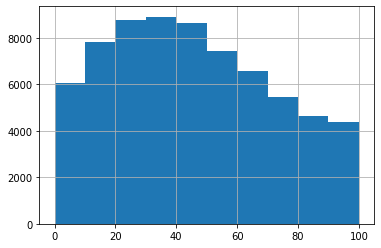

In [302]:
data['COMMENT'].str.len().hist(range = (0,100))

## Removing the punctuations 

In [4]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree


In [5]:
data['COMMENT'] = data['COMMENT'].apply(lambda x:remove_punctuation(x))
data['COMMENT']

0        Realizing that they are in the power supply bu...
1        Futuri has grown employment by a huge amount b...
2                                      assistance for DBOs
3        The market is shifting and we arent adapting C...
4        Quicker growth and store openings so people wi...
                               ...                        
98584                           Growing at the right speed
98585    I like that we are not doing what we have alwa...
98586    I love everything about the direction REMAX 1 ...
98587    Expanding and growing Its great to be apart of...
98588    I like that our team of workers at wesco get a...
Name: COMMENT, Length: 98589, dtype: object

## Lowering the lines

In [6]:
data['COMMENT'] = data['COMMENT'].apply(lambda x: x.lower())
data['COMMENT']

0        realizing that they are in the power supply bu...
1        futuri has grown employment by a huge amount b...
2                                      assistance for dbos
3        the market is shifting and we arent adapting c...
4        quicker growth and store openings so people wi...
                               ...                        
98584                           growing at the right speed
98585    i like that we are not doing what we have alwa...
98586    i love everything about the direction remax 1 ...
98587    expanding and growing its great to be apart of...
98588    i like that our team of workers at wesco get a...
Name: COMMENT, Length: 98589, dtype: object

## Removing the Stopwords

In [7]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
data['COMMENT'] = data['COMMENT'].apply(lambda x:' '.join([i for i in x.split() if i not in stopwords]))
data['COMMENT']

0        realizing power supply business generator truc...
1        futuri grown employment huge amount doesnt see...
2                                          assistance dbos
3        market shifting arent adapting customers want ...
4        quicker growth store openings people within or...
                               ...                        
98584                                  growing right speed
98585    like always done like idea copresidency like h...
98586    love everything direction remax 1 moving feel ...
98587                        expanding growing great apart
98588    like team workers wesco get along theres littl...
Name: COMMENT, Length: 98589, dtype: object

## Getting words dictionary without stopwords

In [18]:
corpus=[]
new= data['COMMENT'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1

In [19]:
corpus

['realizing',
 'power',
 'supply',
 'business',
 'generator',
 'truck',
 'repair',
 'business',
 'futuri',
 'grown',
 'employment',
 'huge',
 'amount',
 'doesnt',
 'seem',
 'eager',
 'give',
 'raises',
 'existing',
 'employees',
 'everyone',
 'company',
 'get',
 'regular',
 'raises',
 'least',
 'costofliving',
 'adjustments',
 'dont',
 'overhire',
 'tight',
 'money',
 'turnover',
 'high',
 'key',
 'positions',
 'hire',
 'strategically',
 'swing',
 'less',
 'wildly',
 'assistance',
 'dbos',
 'market',
 'shifting',
 'arent',
 'adapting',
 'customers',
 'want',
 'shorter',
 'cheaper',
 'assessments',
 'continue',
 'say',
 'longer',
 'better',
 'may',
 'true',
 'market',
 'wants',
 'need',
 'solution',
 'smaller',
 'companies',
 'limited',
 'budgets',
 'quicker',
 'growth',
 'store',
 'openings',
 'people',
 'within',
 'organization',
 'stay',
 'focused',
 'excited',
 'part',
 'growth',
 'rather',
 'looking',
 'options',
 'competing',
 'restaurant',
 'companies',
 'take',
 'care',
 'workin

## Plot for most occuring words

<AxesSubplot:>

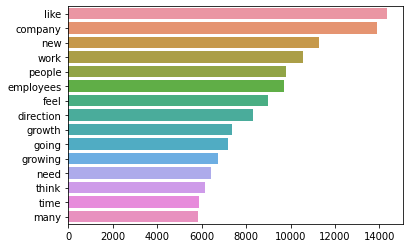

In [20]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:15]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## WordCloud of the Data

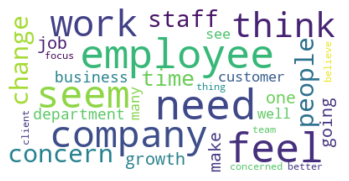

In [21]:
word=" ".join(word for word in (data['COMMENT'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


## Loading package from spacy

In [22]:
nlp = spacy.load('en_core_web_sm')

## Defining different csv file having 1000 data

In [23]:
data1=data['COMMENT'][:1000]
data1.to_csv('Com.csv')
data1

0      realizing power supply business generator truc...
1      futuri grown employment huge amount doesnt see...
2                                        assistance dbos
3      market shifting arent adapting customers want ...
4      quicker growth store openings people within or...
                             ...                        
995    collaboration among areas welldefined strategi...
996                                     grow need people
997    needs commitment work projects work begins man...
998              better coordination effort starting top
999    would like entergy maintain nuclear plants inv...
Name: COMMENT, Length: 1000, dtype: object

In [24]:
filepath = "Com.csv"
document = nlp(open(filepath, encoding="utf-8").read())


## Adjectives and its Count

In [25]:
adjs = []
for token in document:
    if token.pos_ == 'ADJ':
        adjs.append(token.text)

In [26]:
adjs

['huge',
 'eager',
 'regular',
 'least',
 'overhire',
 'tight',
 'high',
 'key',
 'shorter',
 'cheaper',
 'true',
 'smaller',
 '4,quicker',
 'focused',
 'excited',
 '5,take',
 'unique',
 '6,less',
 'different',
 'negative',
 'positive',
 'impossible',
 'large',
 'daily',
 'sure',
 'valuable',
 'unhappy',
 'unrealistic',
 'international',
 'apparent',
 'good',
 'several',
 'small',
 'big',
 'nice',
 'focused',
 'possible',
 'extra',
 'initial',
 'upper',
 'various',
 'many',
 'many',
 'multiple',
 'compliant',
 'captive',
 'lean',
 'external',
 'endless',
 'friendly',
 'new',
 'hesitant',
 'confidential',
 'previous',
 'previous',
 'negative',
 'guilty',
 'timely',
 'much',
 'different',
 'modern',
 'actual',
 'disciplinary',
 'strong',
 'modern',
 'great',
 'better',
 'efficient',
 'correct',
 'many',
 'front',
 'good',
 'good',
 'many',
 'back',
 'inefficient',
 'timely',
 'better',
 'proper',
 'upper',
 'enough',
 'outside',
 'better',
 'accountable',
 'certain',
 'front',
 'senior',

In [27]:
adjs_tally = Counter(adjs)
adjs_tally.most_common()

[('new', 87),
 ('many', 66),
 ('better', 59),
 ('good', 50),
 ('much', 47),
 ('less', 29),
 ('right', 27),
 ('enough', 26),
 ('different', 24),
 ('great', 24),
 ('best', 23),
 ('high', 21),
 ('last', 21),
 ('little', 21),
 ('upper', 20),
 ('higher', 20),
 ('senior', 19),
 ('big', 18),
 ('current', 18),
 ('corporate', 17),
 ('important', 17),
 ('able', 17),
 ('open', 16),
 ('personal', 16),
 ('small', 15),
 ('certain', 15),
 ('top', 15),
 ('due', 15),
 ('prime', 15),
 ('possible', 14),
 ('internal', 14),
 ('sure', 13),
 ('accountable', 13),
 ('actual', 12),
 ('long', 12),
 ('concerned', 12),
 ('future', 12),
 ('special', 12),
 ('strong', 11),
 ('efficient', 11),
 ('poor', 11),
 ('difficult', 11),
 ('huge', 10),
 ('focused', 10),
 ('several', 10),
 ('financial', 10),
 ('full', 10),
 ('common', 10),
 ('happy', 10),
 ('constant', 10),
 ('negative', 9),
 ('fair', 9),
 ('lower', 9),
 ('recent', 9),
 ('professional', 9),
 ('positive', 8),
 ('large', 8),
 ('successful', 8),
 ('complete', 8),
 

In [40]:
df = pd.DataFrame(adjs_tally.most_common(), columns=['adj', 'Acount'])
df[:200]

,adj,Acount
0,new,87
1,many,66
2,better,59
3,good,50
4,much,47
...,...,...
195,comfortable,3
196,healthy,3
197,inclusive,3
198,operational,3


## Noun and its Count

In [41]:
nouns = []
for token in document:
    if token.pos_ == 'NOUN':
        nouns.append(token.text)

nouns_tally = Counter(nouns)

dfs = pd.DataFrame(nouns_tally.most_common(), columns=['noun', 'Ncount'])
dfs[:200]


,noun,Ncount
0,employees,170
1,people,129
2,work,122
3,company,117
4,management,99
...,...,...
195,board,8
196,mentality,8
197,increases,8
198,stores,8


## Verb and its Count

In [42]:
verbs = [token.text for token in document if token.pos_ == 'VERB']

verbs_tally = Counter(verbs)

dfv = pd.DataFrame(verbs_tally.most_common(), columns=['verb', 'Vcount'])
dfv[:200]

,verb,Vcount
0,feel,88
1,make,82
2,see,68
3,need,65
4,get,59
...,...,...
195,changed,4
196,spent,4
197,encourage,4
198,follow,4


In [43]:
adverbs = []
for token in document:
    if token.pos_ == 'ADV':
        adverbs.append(token.text)

adverbs_tally = Counter(adverbs)

dfa = pd.DataFrame(adverbs_tally.most_common(), columns=['adverb', 'ADcount'])
dfa[:200]


,adverb,ADcount
0,also,55
1,instead,42
2,well,31
3,always,30
4,less,23
...,...,...
195,though,1
196,additionally,1
197,twice,1
198,"641,adequately",1


## Single DataFrame of Adjective, Noun & Verb

In [36]:
a = dfs[["noun", "Ncount"]]
b = df.join(a)
c = dfv[['verb', 'Vcount']]
d = b.join(c)
e = dfa[['adverb', 'ADcount']]

In [37]:
dt = d.join(e)
dt

,adj,Acount,noun,Ncount,verb,Vcount,adverb,ADcount
0,new,87,employees,170,feel,88,also,55.0
1,many,66,people,129,make,82,instead,42.0
2,better,59,work,122,see,68,well,31.0
3,good,50,company,117,need,65,always,30.0
4,much,47,management,99,get,59,less,23.0
...,...,...,...,...,...,...,...,...
731,renewable,1,conference,2,audits,1,NaN,NaN
732,vocal,1,website,2,update,1,NaN,NaN
733,loose,1,sync,2,structured,1,NaN,NaN
734,costdetriment,1,understand,2,leveled,1,NaN,NaN


## Plot for Adjective and its Count

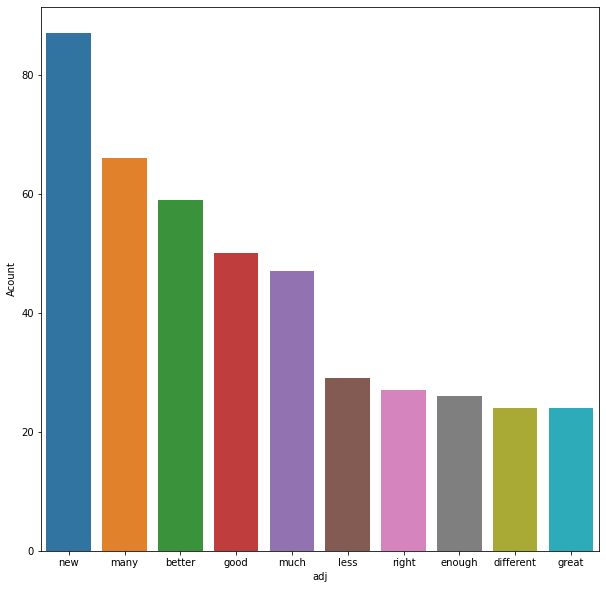

In [161]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.adj[:10], y=dt.Acount)
plt.show()

## Plot for Noun & its Count

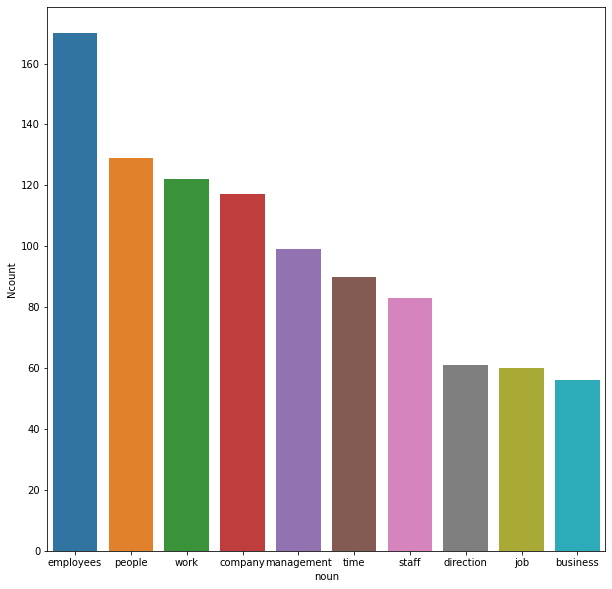

In [163]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.noun[:10], y=dt.Ncount)
plt.show()

## Plot for Verb & its Count

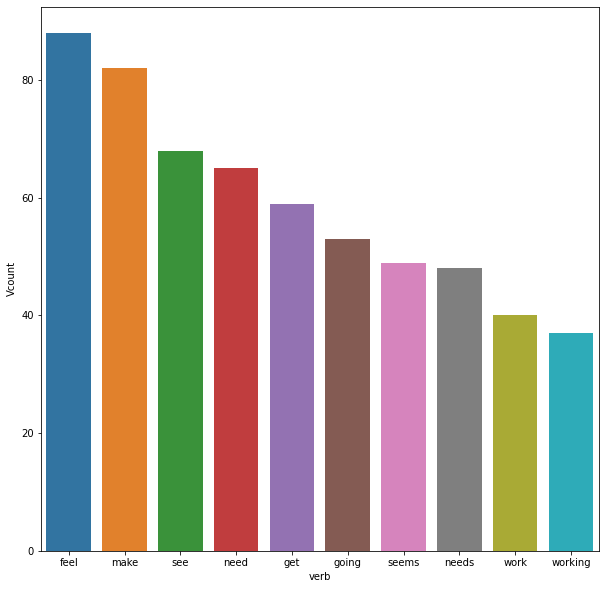

In [199]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.verb[:10], y=dt.Vcount)
plt.show()

## Correlation Heatmap between Adjective's Count , Noun's Count & Verb's Count

<AxesSubplot:>

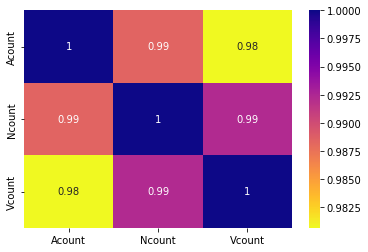

In [162]:
sns.heatmap(dt.corr(),cbar=True,annot=True,cmap='plasma_r')

## WordCloud of Adjectives

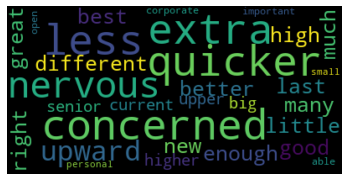

In [173]:
word=" ".join(word for word in (dt['adj'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


## WordCloud of Nouns

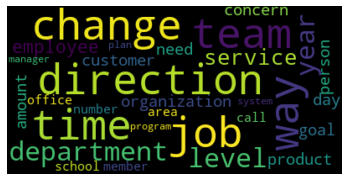

In [174]:
word=" ".join(word for word in (dt['noun'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


## WordCloud of Verbs

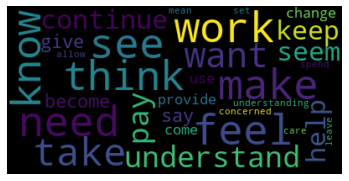

In [175]:
word=" ".join(word for word in (dt['verb'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


## Dataframe of Adjective's Count , Noun's Count & Verb's Count

In [192]:
plotdt = pd.DataFrame(data = dt, columns=['Acount', 'Ncount', 'Vcount'])
plotdt[:10]

,Acount,Ncount,Vcount
0,87,170,88
1,66,129,82
2,59,122,68
3,50,117,65
4,47,99,59
5,29,90,53
6,27,83,49
7,26,61,48
8,24,60,40
9,24,56,37


## Comparission plot of Adjective, Noun & Verb

<AxesSubplot:>

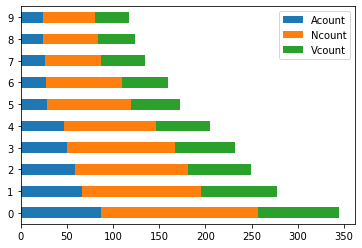

In [193]:
plotdt[:10].plot(kind='barh', stacked = True)

## Tokenizing the Data

In [44]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
data['comment_tokenize']= data['COMMENT'].apply(lambda x: tokenization(x))
data.head()

,COMMENT,comment_tokenize
0,realizing power supply business generator truc...,[realizing power supply business generator tru...
1,futuri grown employment huge amount doesnt see...,[futuri grown employment huge amount doesnt se...
2,assistance dbos,[assistance dbos]
3,market shifting arent adapting customers want ...,[market shifting arent adapting customers want...
4,quicker growth store openings people within or...,[quicker growth store openings people within o...


## Stemming the Data

In [45]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stems = [porter_stemmer.stem(word) for word in text]
    return stems
data['comment_stemmed']=data['COMMENT'].apply(lambda x: stemming(x.split()))
data.head()

,COMMENT,comment_tokenize,comment_stemmed
0,realizing power supply business generator truc...,[realizing power supply business generator tru...,"[realiz, power, suppli, busi, gener, truck, re..."
1,futuri grown employment huge amount doesnt see...,[futuri grown employment huge amount doesnt se...,"[futuri, grown, employ, huge, amount, doesnt, ..."
2,assistance dbos,[assistance dbos],"[assist, dbo]"
3,market shifting arent adapting customers want ...,[market shifting arent adapting customers want...,"[market, shift, arent, adapt, custom, want, sh..."
4,quicker growth store openings people within or...,[quicker growth store openings people within o...,"[quicker, growth, store, open, peopl, within, ..."


## Lemmatizing the Data

In [46]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
    lemm = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm
data['comment_lemmatized']=data['comment_stemmed'].apply(lambda x:lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,COMMENT,comment_tokenize,comment_stemmed,comment_lemmatized
0,realizing power supply business generator truc...,[realizing power supply business generator tru...,"[realiz, power, suppli, busi, gener, truck, re...","[realiz, power, suppli, busi, gener, truck, re..."
1,futuri grown employment huge amount doesnt see...,[futuri grown employment huge amount doesnt se...,"[futuri, grown, employ, huge, amount, doesnt, ...","[futuri, grown, employ, huge, amount, doesnt, ..."
2,assistance dbos,[assistance dbos],"[assist, dbo]","[assist, dbo]"
3,market shifting arent adapting customers want ...,[market shifting arent adapting customers want...,"[market, shift, arent, adapt, custom, want, sh...","[market, shift, arent, adapt, custom, want, sh..."
4,quicker growth store openings people within or...,[quicker growth store openings people within o...,"[quicker, growth, store, open, peopl, within, ...","[quicker, growth, store, open, peopl, within, ..."


# Feature Extraction Using GLOVE

In [9]:
def get_non_glove_words(dataframe, column, model):
    # Unique Words
    counts = dataframe[column].str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts')
    # Extracting Glove Words and Non Glove Words
    non_glove_words = []
    glove_words = []
    for i in counts['unique_words']:
        try:
            model.get_vector(i)
        except KeyError:
            non_glove_words.append(i)
        else:
            glove_words.append(i)
    #Non-Glove words
    non_glove_words_df = pd.DataFrame({'unique_non_glove_words':non_glove_words})
    non_glove_words_df = pd.merge(non_glove_words_df,counts,how='left',left_on=['unique_non_glove_words'],right_on=['unique_words']).iloc[:,[0,2]]
    non_glove_words_df['cum_perc'] = round(100*non_glove_words_df["counts"].cumsum()/non_glove_words_df["counts"].sum(),2)
    print('Done')
    return(non_glove_words_df, glove_words)

In [12]:
data.COMMENT

0        realizing power supply business generator truc...
1        futuri grown employment huge amount doesnt see...
2                                          assistance dbos
3        market shifting arent adapting customers want ...
4        quicker growth store openings people within or...
                               ...                        
98584                                  growing right speed
98585    like always done like idea copresidency like h...
98586    love everything direction remax 1 moving feel ...
98587                        expanding growing great apart
98588    like team workers wesco get along theres littl...
Name: COMMENT, Length: 98589, dtype: object

In [10]:
filename = 'glove.6B.100d.txt'
model = KeyedVectors.load_word2vec_format(filename , binary=False)
    
non_glove_words_df,glove_words = get_non_glove_words(data, column = 'COMMENT', model = model)
print(len(non_glove_words_df))

Done
23018


In [11]:
len(glove_words)

17612

In [50]:
glove_words

['like',
 'company',
 'new',
 'work',
 'people',
 'employees',
 'feel',
 'direction',
 'growth',
 'going',
 'growing',
 'need',
 'think',
 'time',
 'many',
 'staff',
 'good',
 'us',
 'always',
 'get',
 'make',
 'better',
 'business',
 'seems',
 'management',
 'care',
 'much',
 'things',
 'great',
 'see',
 'focus',
 'would',
 'right',
 'also',
 'one',
 'needs',
 'future',
 'concerned',
 'way',
 'well',
 'job',
 'changes',
 'best',
 'grow',
 'technology',
 'leadership',
 'concerns',
 'team',
 'customers',
 'students',
 'lot',
 'making',
 'change',
 'know',
 'working',
 'years',
 'keep',
 'industry',
 'really',
 'getting',
 'lack',
 'enough',
 'customer',
 'believe',
 'help',
 'continue',
 'culture',
 'money',
 'trying',
 'want',
 'less',
 'im',
 'moving',
 'positive',
 'market',
 'quality',
 'seem',
 'place',
 'clients',
 'pay',
 'looking',
 'concern',
 'support',
 'take',
 'fast',
 'year',
 'opportunities',
 'service',
 'without',
 'community',
 'long',
 'patients',
 'big',
 'sales',
 '

In [51]:
def extract_vectors(dataframe, column, method, non_glove_words_df, n=3):
    if method=="first_n_words":
        #Approach: First n words
        #Add 'blank' to words less than n
        dataframe['Length_Glove_Words'] = dataframe[column].str.split().str.len()
        def blank_words (row, n):
            for i in range(1,n+1) :
                if row['Length_Glove_Words'] == i :
                    return ' blank' * (n-i)
        dataframe['Words'] = dataframe.apply(lambda row: blank_words(row,n),axis=1)
        dataframe['Top_Words'] = dataframe[column].fillna('') + dataframe['Words'].fillna('')
        dataframe.drop(['Length_Glove_Words','Words'], axis=1, inplace=True)
        #Select First n Words
        dataframe['Top_Words'] = dataframe['Top_Words'].str.split().str[0:n].str.join(' ')
        non_glove=list(non_glove_words_df['unique_non_glove_words'].unique())
        dataframe=dataframe[~dataframe['Top_Words'].apply(lambda x: any([k in x for k in non_glove]))]
        dataframe.Top_Words.replace('', np.nan, inplace=True)
        dataframe.dropna(subset=['Top_Words'], inplace=True)
        print(dataframe)
        #Add Glove embeddings
        gloveFile = "glove.6B.100.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        # Unique words
        unique = list(dataframe['Top_Words'].str.split(' ', expand=True).stack().unique())
        while("" in unique) :
            unique.remove("")
        #print(unique)
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        #print(unique_word_vec)
        del Glovewords,unique
        #Glove vectors for top 3 words        
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            df = []
            for i in range(0,n):
                df = np.append(df,unique_word_vec[row.Top_Words.split(' ')[i]])            
            #df = np.append(df,unique_word_vec[row.Top_Words])
            stack.extend(np.vstack(df).T)
            if j==length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j%100==0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j+=1
        del unique_word_vec
        stack=pd.DataFrame(stack)
        cluster_dataset = dataframe[["Top_Words"]]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset
    elif method == "sum_word_vectors":        
        #Approach: Sum of d word vectors for n words
        #Add Glove embeddings
        dataframe['Top_Words'] = dataframe[column].str.split().str.join(' ')
        #Select First n Words
        non_glove=list(non_glove_words_df['unique_non_glove_words'].unique())
        dataframe=dataframe[~dataframe['Top_Words'].apply(lambda x: any([k in x for k in non_glove]))]
        dataframe.Top_Words.replace('', np.nan, inplace=True)
        dataframe.dropna(subset=['Top_Words'], inplace=True)
        print(dataframe)
        gloveFile = "glove.6B.100.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        # Unique words
        unique = list(dataframe['Top_Words'].str.split(' ', expand=True).stack().unique())
        while("" in unique) :
            unique.remove("")
        #print(unique)
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        #print(unique_word_vec)
        del Glovewords,unique
        #Sum of Glove vectors for n words
        from operator import add
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            sum_word_vec = [0]*100
            for word in row['Top_Words'].split(' '):
                word_vec = unique_word_vec[word]
                sum_word_vec = list(map(add, sum_word_vec, word_vec))
            stack.extend([sum_word_vec])
            if j==length:
               print('\rProgress:  100%', end='')
               sys.stdout.flush()
            elif j%100==0:
               print('\rProgress: %d' % j, end='')
               sys.stdout.flush()
            j+=1
        stack=pd.DataFrame(stack)
        cluster_dataset = dataframe[['Top_Words']]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset
    

In [52]:
cluster_dataset = extract_vectors(data,column='COMMENT',method='first_n_words', non_glove_words_df = non_glove_words_df, n=3)  

/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


                                                 COMMENT  \
8                                                   grow   
17                                                 thing   
34     would like planes really commit vision think w...   
39     would like see better procedures efficient one...   
44                                            keep trend   
...                                                  ...   
98531                                            im sure   
98548                                                see   
98552  like moving forward opens opportunities future...   
98578      great think play positive role community area   
98581  like fact keep growing ara still family im 14t...   

                                        comment_tokenize  \
8                                                 [grow]   
17                                               [thing]   
34     [would like planes really commit vision think ...   
39     [would like see better procedure

In [100]:
cluster_dataset['Top_Words']=cluster_dataset['Top_Words'].str.replace('\d+', '')

/tmp/ipykernel_16002/2038466255.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cluster_dataset['Top_Words']=cluster_dataset['Top_Words'].str.replace('\d+', '')


In [131]:
nlp = spacy.load('en_core_web_sm')

In [134]:
dataa = cluster_dataset[:1000]
dataa = dataa['Top_Words']
dataa.to_csv('Cd.csv')
dataa

0           grow blank blank
1          thing blank blank
2          would like planes
3             would like see
4           keep trend blank
               ...          
995        feel like changes
996      turning sales blank
997    think company resting
998         would say headed
999           na blank blank
Name: Top_Words, Length: 1000, dtype: object

In [135]:
filepath = "Cd.csv"
document = nlp(open(filepath).read())

In [137]:
adj = []
for token in document:
    if token.pos_ == 'ADJ':
        adj.append(token.text)

adj_tally = Counter(adj)

dfa = pd.DataFrame(adj_tally.most_common(), columns=['adj', 'Acount'])
dfa[:100]

,adj,Acount
0,blank,287
1,many,13
2,big,7
3,great,6
4,worried,4
...,...,...
64,lengthy,1
65,wrong,1
66,comparable,1
67,online,1


In [160]:
adj_words = list(set([word for sublist in [document.split() for document in adj] for word in sublist]))

word_adj_vectors = np.array([nlp(word).vector for word in adj_words])
df1 = pd.DataFrame(word_adj_vectors, index=adj_words)
df1

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
open,-0.977751,0.450361,0.311777,0.502981,-0.416487,-0.342204,-0.498896,-0.020836,0.242185,-0.597344,...,-0.506099,-0.752667,-0.727123,0.123692,1.032662,-0.705267,-0.009354,-0.346997,1.381424,0.669390
fine,-1.141763,0.097163,0.193496,1.274481,-0.471860,-0.395376,-0.575648,-0.268563,-0.023695,-0.445502,...,-0.404826,-0.461944,-0.908788,0.744177,-0.167827,0.273547,0.022713,0.164489,1.461831,0.129008
unable,-0.424375,0.456033,0.599332,0.468204,-1.003004,-0.046024,-0.672989,-0.083031,-0.356904,-0.513963,...,-1.443088,-1.179146,-0.629005,1.588920,3.305562,0.272415,0.264923,-0.787347,0.905633,0.098126
clean,-0.110839,-0.557962,1.213613,0.601712,-0.288371,-1.042449,-0.118347,0.562972,-0.097732,0.143437,...,0.151605,-0.435590,-0.580549,0.112736,1.217030,-0.355601,-0.141285,-0.190465,0.862478,0.577818
main,-0.980937,-0.200368,-0.167151,1.016810,-0.242019,0.003217,-0.076014,0.609795,-0.119386,-0.345101,...,-0.312259,-0.509876,-0.552285,-0.830008,0.429013,-0.136752,0.985167,0.371235,1.003044,-0.620460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
comparable,-1.196768,0.693993,0.279096,0.789539,-0.566691,-0.369107,-0.624129,0.206025,-0.408476,-0.009254,...,-0.515957,-1.132530,-1.284879,0.626667,1.737763,0.459846,0.469557,0.000026,1.490333,0.556421
flexible,-0.880958,0.784350,0.690391,0.277109,-0.015996,-0.802653,-0.483870,0.576329,-0.053634,0.008613,...,-0.402197,-0.246215,-0.585211,1.030226,1.169892,0.090002,0.717403,0.486143,1.222012,0.030340
loyal,-1.215091,0.419306,0.117987,0.548706,-0.727027,-0.229508,-0.124458,1.147563,0.010925,0.629847,...,-0.770624,-0.920778,-1.061577,-0.257609,1.115807,-0.017359,0.250116,0.026867,1.715673,-0.581786
big,-1.238271,0.425498,0.483317,0.067880,0.084602,-0.155673,-0.024506,0.473645,-0.243151,-0.038004,...,-0.485592,-0.434639,-0.261002,0.109186,1.605072,-0.363820,-0.231383,0.000838,0.901054,-0.099728


In [161]:
df1.reset_index(level=0, inplace=True)
df1

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,open,-0.977751,0.450361,0.311777,0.502981,-0.416487,-0.342204,-0.498896,-0.020836,0.242185,...,-0.506099,-0.752667,-0.727123,0.123692,1.032662,-0.705267,-0.009354,-0.346997,1.381424,0.669390
1,fine,-1.141763,0.097163,0.193496,1.274481,-0.471860,-0.395376,-0.575648,-0.268563,-0.023695,...,-0.404826,-0.461944,-0.908788,0.744177,-0.167827,0.273547,0.022713,0.164489,1.461831,0.129008
2,unable,-0.424375,0.456033,0.599332,0.468204,-1.003004,-0.046024,-0.672989,-0.083031,-0.356904,...,-1.443088,-1.179146,-0.629005,1.588920,3.305562,0.272415,0.264923,-0.787347,0.905633,0.098126
3,clean,-0.110839,-0.557962,1.213613,0.601712,-0.288371,-1.042449,-0.118347,0.562972,-0.097732,...,0.151605,-0.435590,-0.580549,0.112736,1.217030,-0.355601,-0.141285,-0.190465,0.862478,0.577818
4,main,-0.980937,-0.200368,-0.167151,1.016810,-0.242019,0.003217,-0.076014,0.609795,-0.119386,...,-0.312259,-0.509876,-0.552285,-0.830008,0.429013,-0.136752,0.985167,0.371235,1.003044,-0.620460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,comparable,-1.196768,0.693993,0.279096,0.789539,-0.566691,-0.369107,-0.624129,0.206025,-0.408476,...,-0.515957,-1.132530,-1.284879,0.626667,1.737763,0.459846,0.469557,0.000026,1.490333,0.556421
65,flexible,-0.880958,0.784350,0.690391,0.277109,-0.015996,-0.802653,-0.483870,0.576329,-0.053634,...,-0.402197,-0.246215,-0.585211,1.030226,1.169892,0.090002,0.717403,0.486143,1.222012,0.030340
66,loyal,-1.215091,0.419306,0.117987,0.548706,-0.727027,-0.229508,-0.124458,1.147563,0.010925,...,-0.770624,-0.920778,-1.061577,-0.257609,1.115807,-0.017359,0.250116,0.026867,1.715673,-0.581786
67,big,-1.238271,0.425498,0.483317,0.067880,0.084602,-0.155673,-0.024506,0.473645,-0.243151,...,-0.485592,-0.434639,-0.261002,0.109186,1.605072,-0.363820,-0.231383,0.000838,0.901054,-0.099728


In [162]:
df1.rename({'index': 'Adjectives'}, axis=1, inplace=True)
df1

,Adjectives,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,open,-0.977751,0.450361,0.311777,0.502981,-0.416487,-0.342204,-0.498896,-0.020836,0.242185,...,-0.506099,-0.752667,-0.727123,0.123692,1.032662,-0.705267,-0.009354,-0.346997,1.381424,0.669390
1,fine,-1.141763,0.097163,0.193496,1.274481,-0.471860,-0.395376,-0.575648,-0.268563,-0.023695,...,-0.404826,-0.461944,-0.908788,0.744177,-0.167827,0.273547,0.022713,0.164489,1.461831,0.129008
2,unable,-0.424375,0.456033,0.599332,0.468204,-1.003004,-0.046024,-0.672989,-0.083031,-0.356904,...,-1.443088,-1.179146,-0.629005,1.588920,3.305562,0.272415,0.264923,-0.787347,0.905633,0.098126
3,clean,-0.110839,-0.557962,1.213613,0.601712,-0.288371,-1.042449,-0.118347,0.562972,-0.097732,...,0.151605,-0.435590,-0.580549,0.112736,1.217030,-0.355601,-0.141285,-0.190465,0.862478,0.577818
4,main,-0.980937,-0.200368,-0.167151,1.016810,-0.242019,0.003217,-0.076014,0.609795,-0.119386,...,-0.312259,-0.509876,-0.552285,-0.830008,0.429013,-0.136752,0.985167,0.371235,1.003044,-0.620460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,comparable,-1.196768,0.693993,0.279096,0.789539,-0.566691,-0.369107,-0.624129,0.206025,-0.408476,...,-0.515957,-1.132530,-1.284879,0.626667,1.737763,0.459846,0.469557,0.000026,1.490333,0.556421
65,flexible,-0.880958,0.784350,0.690391,0.277109,-0.015996,-0.802653,-0.483870,0.576329,-0.053634,...,-0.402197,-0.246215,-0.585211,1.030226,1.169892,0.090002,0.717403,0.486143,1.222012,0.030340
66,loyal,-1.215091,0.419306,0.117987,0.548706,-0.727027,-0.229508,-0.124458,1.147563,0.010925,...,-0.770624,-0.920778,-1.061577,-0.257609,1.115807,-0.017359,0.250116,0.026867,1.715673,-0.581786
67,big,-1.238271,0.425498,0.483317,0.067880,0.084602,-0.155673,-0.024506,0.473645,-0.243151,...,-0.485592,-0.434639,-0.261002,0.109186,1.605072,-0.363820,-0.231383,0.000838,0.901054,-0.099728


In [143]:
nouns = []
for token in document:
    if token.pos_ == 'NOUN':
        nouns.append(token.text)

nouns_tally = Counter(nouns)

dfn = pd.DataFrame(nouns_tally.most_common(), columns=['noun', 'Ncount'])
dfn[:100]

,noun,Ncount
0,blank,284
1,company,39
2,time,25
3,changes,19
4,work,18
...,...,...
95,"85,parking",1
96,"87,feel",1
97,"88,would",1
98,"89,id",1


In [149]:
nouns_words = list(set([word for sublist in [document.split() for document in nouns] for word in sublist]))

word_nouns_vectors = np.array([nlp(word).vector for word in nouns_words])
df2 = pd.DataFrame(word_nouns_vectors, index=nouns_words)
df2

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
"686,ki",-1.300084,-0.450791,-0.178391,0.699332,0.481616,-0.600484,-0.580457,1.197778,-0.610617,-0.273351,...,-0.395326,0.748591,-0.689773,0.496651,-0.460986,-0.614935,0.337827,0.768780,0.794774,-0.373484
open,-0.977751,0.450361,0.311777,0.502981,-0.416487,-0.342204,-0.498896,-0.020836,0.242185,-0.597344,...,-0.506099,-0.752667,-0.727123,0.123692,1.032662,-0.705267,-0.009354,-0.346997,1.381424,0.669390
"882,pay",-0.353933,-1.156838,-0.047494,0.643110,0.473321,-0.582492,0.285215,1.400913,-0.434450,-0.759604,...,1.328501,1.238512,-0.527426,0.548551,-0.928738,-0.704387,0.478053,-0.166329,0.722126,0.524727
division,-0.712482,0.139110,0.901719,0.470820,-0.626965,0.095966,-0.056308,0.289556,-0.408028,0.552788,...,-0.515075,-0.057193,-0.735532,-0.087704,-0.623377,0.090493,-0.695466,0.208805,1.128271,-0.044310
salon,1.006009,-0.799629,0.655507,0.402878,0.573304,-0.036616,-1.010456,0.692494,-0.447354,1.051678,...,-0.282286,-0.335300,-0.441864,-0.451181,-1.367279,-1.056107,-1.156440,0.842152,1.824739,-0.365864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"87,feel",-0.658456,-0.658689,-0.645674,1.957597,-0.563642,0.243485,-0.517972,0.316688,-0.204259,-0.775409,...,0.977883,1.611837,0.293757,-0.300850,-0.573755,-0.716398,0.103030,-0.458029,0.732219,0.284644
area,-0.385374,-0.559624,0.781490,1.030559,-0.142535,0.370449,-1.060411,0.060852,-0.153388,0.881566,...,0.074477,0.667226,-1.324050,0.409127,-0.865889,-0.189153,-0.717901,-0.249168,1.217439,0.350139
pipeline,-0.402022,-0.355750,0.169803,0.399330,0.401064,0.138470,0.196738,0.414617,-0.258171,0.346515,...,0.336220,0.377889,-1.095871,0.190925,-1.706813,-0.233482,-0.829828,-0.071075,0.365938,0.223378
"84,seems",-1.142360,-1.116977,0.061702,1.573527,-0.489738,-1.247054,-1.356434,1.277850,-0.837940,-1.162371,...,0.841676,0.931779,-0.173841,-1.006851,0.101304,-0.150204,-1.388727,0.507570,-0.077581,1.318611


In [150]:
df2.reset_index(level=0, inplace=True)
df2

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,"686,ki",-1.300084,-0.450791,-0.178391,0.699332,0.481616,-0.600484,-0.580457,1.197778,-0.610617,...,-0.395326,0.748591,-0.689773,0.496651,-0.460986,-0.614935,0.337827,0.768780,0.794774,-0.373484
1,open,-0.977751,0.450361,0.311777,0.502981,-0.416487,-0.342204,-0.498896,-0.020836,0.242185,...,-0.506099,-0.752667,-0.727123,0.123692,1.032662,-0.705267,-0.009354,-0.346997,1.381424,0.669390
2,"882,pay",-0.353933,-1.156838,-0.047494,0.643110,0.473321,-0.582492,0.285215,1.400913,-0.434450,...,1.328501,1.238512,-0.527426,0.548551,-0.928738,-0.704387,0.478053,-0.166329,0.722126,0.524727
3,division,-0.712482,0.139110,0.901719,0.470820,-0.626965,0.095966,-0.056308,0.289556,-0.408028,...,-0.515075,-0.057193,-0.735532,-0.087704,-0.623377,0.090493,-0.695466,0.208805,1.128271,-0.044310
4,salon,1.006009,-0.799629,0.655507,0.402878,0.573304,-0.036616,-1.010456,0.692494,-0.447354,...,-0.282286,-0.335300,-0.441864,-0.451181,-1.367279,-1.056107,-1.156440,0.842152,1.824739,-0.365864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,"87,feel",-0.658456,-0.658689,-0.645674,1.957597,-0.563642,0.243485,-0.517972,0.316688,-0.204259,...,0.977883,1.611837,0.293757,-0.300850,-0.573755,-0.716398,0.103030,-0.458029,0.732219,0.284644
250,area,-0.385374,-0.559624,0.781490,1.030559,-0.142535,0.370449,-1.060411,0.060852,-0.153388,...,0.074477,0.667226,-1.324050,0.409127,-0.865889,-0.189153,-0.717901,-0.249168,1.217439,0.350139
251,pipeline,-0.402022,-0.355750,0.169803,0.399330,0.401064,0.138470,0.196738,0.414617,-0.258171,...,0.336220,0.377889,-1.095871,0.190925,-1.706813,-0.233482,-0.829828,-0.071075,0.365938,0.223378
252,"84,seems",-1.142360,-1.116977,0.061702,1.573527,-0.489738,-1.247054,-1.356434,1.277850,-0.837940,...,0.841676,0.931779,-0.173841,-1.006851,0.101304,-0.150204,-1.388727,0.507570,-0.077581,1.318611


In [151]:
df2.rename({'index': 'Nouns'}, axis=1, inplace=True)
df2

,Nouns,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,"686,ki",-1.300084,-0.450791,-0.178391,0.699332,0.481616,-0.600484,-0.580457,1.197778,-0.610617,...,-0.395326,0.748591,-0.689773,0.496651,-0.460986,-0.614935,0.337827,0.768780,0.794774,-0.373484
1,open,-0.977751,0.450361,0.311777,0.502981,-0.416487,-0.342204,-0.498896,-0.020836,0.242185,...,-0.506099,-0.752667,-0.727123,0.123692,1.032662,-0.705267,-0.009354,-0.346997,1.381424,0.669390
2,"882,pay",-0.353933,-1.156838,-0.047494,0.643110,0.473321,-0.582492,0.285215,1.400913,-0.434450,...,1.328501,1.238512,-0.527426,0.548551,-0.928738,-0.704387,0.478053,-0.166329,0.722126,0.524727
3,division,-0.712482,0.139110,0.901719,0.470820,-0.626965,0.095966,-0.056308,0.289556,-0.408028,...,-0.515075,-0.057193,-0.735532,-0.087704,-0.623377,0.090493,-0.695466,0.208805,1.128271,-0.044310
4,salon,1.006009,-0.799629,0.655507,0.402878,0.573304,-0.036616,-1.010456,0.692494,-0.447354,...,-0.282286,-0.335300,-0.441864,-0.451181,-1.367279,-1.056107,-1.156440,0.842152,1.824739,-0.365864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,"87,feel",-0.658456,-0.658689,-0.645674,1.957597,-0.563642,0.243485,-0.517972,0.316688,-0.204259,...,0.977883,1.611837,0.293757,-0.300850,-0.573755,-0.716398,0.103030,-0.458029,0.732219,0.284644
250,area,-0.385374,-0.559624,0.781490,1.030559,-0.142535,0.370449,-1.060411,0.060852,-0.153388,...,0.074477,0.667226,-1.324050,0.409127,-0.865889,-0.189153,-0.717901,-0.249168,1.217439,0.350139
251,pipeline,-0.402022,-0.355750,0.169803,0.399330,0.401064,0.138470,0.196738,0.414617,-0.258171,...,0.336220,0.377889,-1.095871,0.190925,-1.706813,-0.233482,-0.829828,-0.071075,0.365938,0.223378
252,"84,seems",-1.142360,-1.116977,0.061702,1.573527,-0.489738,-1.247054,-1.356434,1.277850,-0.837940,...,0.841676,0.931779,-0.173841,-1.006851,0.101304,-0.150204,-1.388727,0.507570,-0.077581,1.318611


In [112]:
verbs = []
for token in document:
    if token.pos_ == 'VERB':
        verbs.append(token.text)

verbs_tally = Counter(verbs)

dfv = pd.DataFrame(verbs_tally.most_common(), columns=['verbs', 'Vcount'])
dfv[:100]

,verbs,Vcount
0,see,183
1,moving,13
2,get,13
3,seems,10
4,needs,9
...,...,...
95,show,1
96,ask,1
97,heard,1
98,grown,1


In [152]:
verbs_words = list(set([word for sublist in [document.split() for document in verbs] for word in sublist]))

word_verbs_vectors = np.array([nlp(word).vector for word in verbs_words])
df3 = pd.DataFrame(word_verbs_vectors, index=verbs_words)
df3

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
investing,-1.209313,-0.479795,-0.729919,2.710852,0.752120,-0.544674,0.872824,0.589095,0.197553,-0.576704,...,-0.438233,0.247826,-0.889845,0.196562,-0.626773,-0.979546,-0.885873,-0.070796,2.438084,0.377256
go,-0.189587,-0.717896,-0.302657,0.173293,0.907189,0.540936,0.754562,1.559487,-0.984894,-0.234463,...,1.535848,0.684350,-0.569666,1.681061,-1.069817,-0.672444,-0.272679,0.137140,0.119429,0.654477
promote,-0.220043,0.404879,-0.139304,1.649640,-0.133818,-0.402233,1.344918,0.294594,-0.823015,-0.300752,...,0.660338,-0.189232,-0.262026,2.633523,-0.561715,-0.223749,-0.490227,-0.044408,-0.316962,-0.108466
wants,-0.410724,-0.382438,0.405273,0.870250,-1.031396,-0.453106,-0.808992,1.070017,-0.638662,-0.238292,...,1.325809,-0.084268,0.233029,2.304921,-0.101465,0.221792,-0.927225,-0.201377,-0.625855,0.913326
help,0.159435,-0.586954,0.463968,1.122169,0.096702,-0.227069,0.868279,1.182435,-0.353390,-0.025311,...,0.525903,0.033172,-0.133994,0.378407,-1.072431,-1.179990,-0.836448,0.142997,0.683608,0.678758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seen,-0.498544,-0.985434,1.061363,1.002778,-0.303872,-0.122840,-0.852680,0.418492,-0.596817,-0.371029,...,0.453866,-1.075393,-0.700088,2.226555,0.223194,0.407726,-1.383953,0.659232,-0.104889,-0.253122
eliminate,-0.222155,-0.395993,-0.261156,0.928726,0.872220,-0.023964,-0.598552,0.412073,-0.569363,0.304176,...,1.079793,0.120924,-0.867344,1.302259,-1.829572,-0.518653,-0.563926,-0.379824,0.371463,0.853836
"76,would",-0.485589,-0.905230,0.420505,2.259968,-0.925728,-0.892305,-1.472507,1.214932,-1.378869,-0.784874,...,0.229564,0.065067,0.206485,-0.978484,0.188544,-0.848724,-0.818853,-0.327391,0.962557,0.230537
sinking,-1.391043,-0.058936,-0.489767,1.452103,0.989291,-0.125013,0.350151,0.746044,-0.124008,-0.375100,...,-0.308789,-0.342444,-0.747886,1.117464,0.368616,-0.044350,-1.038813,0.367522,1.689593,-0.784611


In [153]:
df3.reset_index(level=0, inplace=True)
df3

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,investing,-1.209313,-0.479795,-0.729919,2.710852,0.752120,-0.544674,0.872824,0.589095,0.197553,...,-0.438233,0.247826,-0.889845,0.196562,-0.626773,-0.979546,-0.885873,-0.070796,2.438084,0.377256
1,go,-0.189587,-0.717896,-0.302657,0.173293,0.907189,0.540936,0.754562,1.559487,-0.984894,...,1.535848,0.684350,-0.569666,1.681061,-1.069817,-0.672444,-0.272679,0.137140,0.119429,0.654477
2,promote,-0.220043,0.404879,-0.139304,1.649640,-0.133818,-0.402233,1.344918,0.294594,-0.823015,...,0.660338,-0.189232,-0.262026,2.633523,-0.561715,-0.223749,-0.490227,-0.044408,-0.316962,-0.108466
3,wants,-0.410724,-0.382438,0.405273,0.870250,-1.031396,-0.453106,-0.808992,1.070017,-0.638662,...,1.325809,-0.084268,0.233029,2.304921,-0.101465,0.221792,-0.927225,-0.201377,-0.625855,0.913326
4,help,0.159435,-0.586954,0.463968,1.122169,0.096702,-0.227069,0.868279,1.182435,-0.353390,...,0.525903,0.033172,-0.133994,0.378407,-1.072431,-1.179990,-0.836448,0.142997,0.683608,0.678758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,seen,-0.498544,-0.985434,1.061363,1.002778,-0.303872,-0.122840,-0.852680,0.418492,-0.596817,...,0.453866,-1.075393,-0.700088,2.226555,0.223194,0.407726,-1.383953,0.659232,-0.104889,-0.253122
100,eliminate,-0.222155,-0.395993,-0.261156,0.928726,0.872220,-0.023964,-0.598552,0.412073,-0.569363,...,1.079793,0.120924,-0.867344,1.302259,-1.829572,-0.518653,-0.563926,-0.379824,0.371463,0.853836
101,"76,would",-0.485589,-0.905230,0.420505,2.259968,-0.925728,-0.892305,-1.472507,1.214932,-1.378869,...,0.229564,0.065067,0.206485,-0.978484,0.188544,-0.848724,-0.818853,-0.327391,0.962557,0.230537
102,sinking,-1.391043,-0.058936,-0.489767,1.452103,0.989291,-0.125013,0.350151,0.746044,-0.124008,...,-0.308789,-0.342444,-0.747886,1.117464,0.368616,-0.044350,-1.038813,0.367522,1.689593,-0.784611


In [154]:
df3.rename({'index': 'Verbs'}, axis=1, inplace=True)
df3

,Verbs,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,investing,-1.209313,-0.479795,-0.729919,2.710852,0.752120,-0.544674,0.872824,0.589095,0.197553,...,-0.438233,0.247826,-0.889845,0.196562,-0.626773,-0.979546,-0.885873,-0.070796,2.438084,0.377256
1,go,-0.189587,-0.717896,-0.302657,0.173293,0.907189,0.540936,0.754562,1.559487,-0.984894,...,1.535848,0.684350,-0.569666,1.681061,-1.069817,-0.672444,-0.272679,0.137140,0.119429,0.654477
2,promote,-0.220043,0.404879,-0.139304,1.649640,-0.133818,-0.402233,1.344918,0.294594,-0.823015,...,0.660338,-0.189232,-0.262026,2.633523,-0.561715,-0.223749,-0.490227,-0.044408,-0.316962,-0.108466
3,wants,-0.410724,-0.382438,0.405273,0.870250,-1.031396,-0.453106,-0.808992,1.070017,-0.638662,...,1.325809,-0.084268,0.233029,2.304921,-0.101465,0.221792,-0.927225,-0.201377,-0.625855,0.913326
4,help,0.159435,-0.586954,0.463968,1.122169,0.096702,-0.227069,0.868279,1.182435,-0.353390,...,0.525903,0.033172,-0.133994,0.378407,-1.072431,-1.179990,-0.836448,0.142997,0.683608,0.678758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,seen,-0.498544,-0.985434,1.061363,1.002778,-0.303872,-0.122840,-0.852680,0.418492,-0.596817,...,0.453866,-1.075393,-0.700088,2.226555,0.223194,0.407726,-1.383953,0.659232,-0.104889,-0.253122
100,eliminate,-0.222155,-0.395993,-0.261156,0.928726,0.872220,-0.023964,-0.598552,0.412073,-0.569363,...,1.079793,0.120924,-0.867344,1.302259,-1.829572,-0.518653,-0.563926,-0.379824,0.371463,0.853836
101,"76,would",-0.485589,-0.905230,0.420505,2.259968,-0.925728,-0.892305,-1.472507,1.214932,-1.378869,...,0.229564,0.065067,0.206485,-0.978484,0.188544,-0.848724,-0.818853,-0.327391,0.962557,0.230537
102,sinking,-1.391043,-0.058936,-0.489767,1.452103,0.989291,-0.125013,0.350151,0.746044,-0.124008,...,-0.308789,-0.342444,-0.747886,1.117464,0.368616,-0.044350,-1.038813,0.367522,1.689593,-0.784611


In [138]:
adverbs = []
for token in document:
    if token.pos_ == 'ADV':
        adverbs.append(token.text)

adverbs_tally = Counter(adverbs)

dfs = pd.DataFrame(adverbs_tally.most_common(), columns=['adverbs', 'ADcount'])
dfs[:100]

,adverbs,ADcount
0,fast,10
1,away,8
2,forward,5
3,truly,3
4,longer,3
5,sure,3
6,downward,2
7,maybe,2
8,even,2
9,wrong,2


In [155]:
adverbs_words = list(set([word for sublist in [document.split() for document in adverbs] for word in sublist]))

word_adverbs_vectors = np.array([nlp(word).vector for word in adverbs_words])
df4 = pd.DataFrame(word_adverbs_vectors, index=adverbs_words)
df4

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
maybe,-0.227702,-0.542461,-0.195909,0.446321,0.333743,-0.641477,-0.633941,0.613967,-0.103240,-0.701050,...,0.271530,0.207833,-0.388433,-1.557736,0.374643,0.995117,-0.438085,0.205949,0.742986,1.083706
generally,-0.572391,-0.337941,0.775276,-0.050434,0.302686,-0.188438,-0.507704,0.265033,0.471836,-0.434260,...,-0.345645,0.113597,-0.335183,-0.837334,0.965576,1.013675,-0.543059,-0.246538,1.478728,-0.481110
even,-0.866571,-0.074175,-0.056179,1.023706,0.478381,-0.488132,-0.005320,0.218719,-0.524163,-0.951453,...,0.328630,-0.127916,0.503171,-1.348384,0.066142,0.486077,-0.581939,-0.215774,1.579163,0.007938
first,-1.306101,-0.978577,0.533409,1.190963,-0.591567,-0.971074,-0.116281,0.528210,0.122042,-0.941861,...,-0.467197,-0.683029,-0.133636,0.432591,1.072847,0.306252,-0.598414,0.776492,0.008385,0.765018
fast,-0.731581,-0.722720,0.455772,0.782458,0.865686,-0.007708,-0.257573,-0.258572,-0.273704,-0.039071,...,-0.529051,-0.439142,-0.536210,0.445555,-0.240309,0.245909,-0.497702,0.825662,1.024495,-0.166849
fairly,0.451929,-1.442848,-0.074423,0.183856,-0.068977,0.210087,-0.847743,-0.050662,-0.678566,-0.648375,...,-1.164061,-0.773527,0.079649,-0.178485,-0.591710,0.592628,-1.126885,0.200648,1.384418,1.439658
yet,-0.105645,-0.798997,-0.223543,-0.051081,1.102245,-0.787460,-0.198651,-0.057636,-1.104697,0.052644,...,-0.302024,0.595840,0.171115,-0.141234,-0.557797,1.077298,0.073235,-0.007062,1.184775,0.419796
downward,-1.078024,-0.738853,0.182435,0.573794,-0.204364,-0.037709,-1.117518,0.427100,0.021557,-0.043329,...,-0.865398,-0.507698,-0.296101,-0.099544,-0.718364,0.278764,-0.941749,0.193671,1.722052,0.422885
genuinely,-0.352855,-1.070110,0.582488,0.873374,-0.147459,0.198462,-0.756439,0.250893,0.115687,-0.378637,...,-0.789094,-0.577845,-0.485213,-1.177906,0.738785,0.545273,-1.121971,-0.095990,1.751145,0.662104
pretty,-0.440453,-2.011667,0.012406,0.737733,-0.338932,-0.039096,-0.400970,-0.000748,-0.374119,-1.103737,...,-0.589216,-0.429578,0.331476,0.307878,0.309541,-0.222837,-0.996071,-0.080600,1.086357,-0.446866


In [156]:
df4.reset_index(level=0, inplace=True)
df4

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,maybe,-0.227702,-0.542461,-0.195909,0.446321,0.333743,-0.641477,-0.633941,0.613967,-0.103240,...,0.271530,0.207833,-0.388433,-1.557736,0.374643,0.995117,-0.438085,0.205949,0.742986,1.083706
1,generally,-0.572391,-0.337941,0.775276,-0.050434,0.302686,-0.188438,-0.507704,0.265033,0.471836,...,-0.345645,0.113597,-0.335183,-0.837334,0.965576,1.013675,-0.543059,-0.246538,1.478728,-0.481110
2,even,-0.866571,-0.074175,-0.056179,1.023706,0.478381,-0.488132,-0.005320,0.218719,-0.524163,...,0.328630,-0.127916,0.503171,-1.348384,0.066142,0.486077,-0.581939,-0.215774,1.579163,0.007938
3,first,-1.306101,-0.978577,0.533409,1.190963,-0.591567,-0.971074,-0.116281,0.528210,0.122042,...,-0.467197,-0.683029,-0.133636,0.432591,1.072847,0.306252,-0.598414,0.776492,0.008385,0.765018
4,fast,-0.731581,-0.722720,0.455772,0.782458,0.865686,-0.007708,-0.257573,-0.258572,-0.273704,...,-0.529051,-0.439142,-0.536210,0.445555,-0.240309,0.245909,-0.497702,0.825662,1.024495,-0.166849
5,fairly,0.451929,-1.442848,-0.074423,0.183856,-0.068977,0.210087,-0.847743,-0.050662,-0.678566,...,-1.164061,-0.773527,0.079649,-0.178485,-0.591710,0.592628,-1.126885,0.200648,1.384418,1.439658
6,yet,-0.105645,-0.798997,-0.223543,-0.051081,1.102245,-0.787460,-0.198651,-0.057636,-1.104697,...,-0.302024,0.595840,0.171115,-0.141234,-0.557797,1.077298,0.073235,-0.007062,1.184775,0.419796
7,downward,-1.078024,-0.738853,0.182435,0.573794,-0.204364,-0.037709,-1.117518,0.427100,0.021557,...,-0.865398,-0.507698,-0.296101,-0.099544,-0.718364,0.278764,-0.941749,0.193671,1.722052,0.422885
8,genuinely,-0.352855,-1.070110,0.582488,0.873374,-0.147459,0.198462,-0.756439,0.250893,0.115687,...,-0.789094,-0.577845,-0.485213,-1.177906,0.738785,0.545273,-1.121971,-0.095990,1.751145,0.662104
9,pretty,-0.440453,-2.011667,0.012406,0.737733,-0.338932,-0.039096,-0.400970,-0.000748,-0.374119,...,-0.589216,-0.429578,0.331476,0.307878,0.309541,-0.222837,-0.996071,-0.080600,1.086357,-0.446866


In [157]:
df4.rename({'index': 'Adverbs'}, axis=1, inplace=True)
df4

,Adverbs,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,maybe,-0.227702,-0.542461,-0.195909,0.446321,0.333743,-0.641477,-0.633941,0.613967,-0.103240,...,0.271530,0.207833,-0.388433,-1.557736,0.374643,0.995117,-0.438085,0.205949,0.742986,1.083706
1,generally,-0.572391,-0.337941,0.775276,-0.050434,0.302686,-0.188438,-0.507704,0.265033,0.471836,...,-0.345645,0.113597,-0.335183,-0.837334,0.965576,1.013675,-0.543059,-0.246538,1.478728,-0.481110
2,even,-0.866571,-0.074175,-0.056179,1.023706,0.478381,-0.488132,-0.005320,0.218719,-0.524163,...,0.328630,-0.127916,0.503171,-1.348384,0.066142,0.486077,-0.581939,-0.215774,1.579163,0.007938
3,first,-1.306101,-0.978577,0.533409,1.190963,-0.591567,-0.971074,-0.116281,0.528210,0.122042,...,-0.467197,-0.683029,-0.133636,0.432591,1.072847,0.306252,-0.598414,0.776492,0.008385,0.765018
4,fast,-0.731581,-0.722720,0.455772,0.782458,0.865686,-0.007708,-0.257573,-0.258572,-0.273704,...,-0.529051,-0.439142,-0.536210,0.445555,-0.240309,0.245909,-0.497702,0.825662,1.024495,-0.166849
5,fairly,0.451929,-1.442848,-0.074423,0.183856,-0.068977,0.210087,-0.847743,-0.050662,-0.678566,...,-1.164061,-0.773527,0.079649,-0.178485,-0.591710,0.592628,-1.126885,0.200648,1.384418,1.439658
6,yet,-0.105645,-0.798997,-0.223543,-0.051081,1.102245,-0.787460,-0.198651,-0.057636,-1.104697,...,-0.302024,0.595840,0.171115,-0.141234,-0.557797,1.077298,0.073235,-0.007062,1.184775,0.419796
7,downward,-1.078024,-0.738853,0.182435,0.573794,-0.204364,-0.037709,-1.117518,0.427100,0.021557,...,-0.865398,-0.507698,-0.296101,-0.099544,-0.718364,0.278764,-0.941749,0.193671,1.722052,0.422885
8,genuinely,-0.352855,-1.070110,0.582488,0.873374,-0.147459,0.198462,-0.756439,0.250893,0.115687,...,-0.789094,-0.577845,-0.485213,-1.177906,0.738785,0.545273,-1.121971,-0.095990,1.751145,0.662104
9,pretty,-0.440453,-2.011667,0.012406,0.737733,-0.338932,-0.039096,-0.400970,-0.000748,-0.374119,...,-0.589216,-0.429578,0.331476,0.307878,0.309541,-0.222837,-0.996071,-0.080600,1.086357,-0.446866


In [22]:
cluster_data = extract_vectors(data,column='COMMENT',method='sum_word_vectors', non_glove_words_df = non_glove_words_df)

/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


                               COMMENT                        Top_Words
8                                 grow                             grow
17                               thing                            thing
44                          keep trend                       keep trend
114    flexibility tools work remotely  flexibility tools work remotely
117                               sure                             sure
...                                ...                              ...
98511      bar revolution menu changes      bar revolution menu changes
98523                         maturing                         maturing
98526          freedom change optimize          freedom change optimize
98531                          im sure                          im sure
98548                              see                              see

[3768 rows x 2 columns]
Progress:  100%

In [98]:
nlp = spacy.load('en_core_web_sm')

In [102]:
filepath = "glove_words"
document = nlp(filepath)

In [106]:
unique_words = list(set([word for sublist in [document.split() for document in glove_words] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
df = pd.DataFrame(word_glove_vectors, index=unique_words)
df

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
created,-0.503497,0.730933,0.660870,-0.263811,-0.491909,-0.309195,-0.688478,0.462472,-0.760211,-0.054712,...,0.699782,-0.288894,-0.583208,2.884658,-0.062130,1.598386,-1.523864,0.353237,-0.219901,-0.310191
canceling,-1.212124,-0.419334,-0.707557,2.367106,0.289184,-0.447826,0.774561,0.606645,-0.343370,-0.343481,...,-0.701713,-0.324980,-0.473685,1.264393,-0.303549,-0.516578,-0.806594,0.473598,1.754933,-0.212254
specialties,-0.890932,-0.577434,-0.111191,0.213541,-0.207109,-0.130149,-0.356862,1.048758,-0.512216,0.406900,...,1.558541,-0.187845,-0.157787,-0.439836,0.442621,-0.298659,0.310787,0.234899,0.111625,0.109608
enthusiasm,-0.322571,-0.617406,0.186944,0.715360,-0.003223,1.237303,0.389045,-0.171112,0.010284,-0.145871,...,0.653072,-0.595616,0.052005,-0.163519,-0.638041,-0.179100,0.473116,-0.189884,1.693653,0.030356
streamed,-0.101834,0.144977,0.838483,0.130689,0.143541,0.010029,-0.534487,0.781276,-0.353726,-0.643122,...,0.703544,-0.159851,-0.317230,2.312287,-0.397244,0.899872,-1.824215,0.070210,0.164813,-0.478515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
america,1.309899,-1.122617,0.563742,-0.207353,-0.483358,-1.256061,-0.446236,0.063477,0.031453,0.721537,...,-0.039049,0.225566,-0.324486,0.265056,-0.392512,-0.109882,-1.077009,0.055145,0.979706,0.756228
patron,-0.357138,-0.590891,0.397272,0.181995,-1.119347,-0.401659,-0.902193,-0.335233,-0.524238,0.991355,...,-0.214414,0.042078,-1.056159,0.017162,-0.641281,0.091986,-0.533366,0.155598,0.796546,0.111048
bumped,-0.853348,0.033586,0.597215,-0.212068,-0.576770,-0.374371,-0.489731,-0.564087,-0.611204,-0.493873,...,0.479788,-0.060097,-0.176661,3.040165,-0.239043,1.132518,-1.287471,0.106031,0.488397,-0.446215
start,-0.301044,-0.264799,0.034484,0.452961,0.444688,-0.021038,0.589510,0.723543,-0.463509,0.179401,...,0.528720,-0.250631,-0.881867,1.960290,-1.262158,-0.180095,-0.528658,-0.207148,0.330752,0.074464


In [107]:
df.reset_index(level=0, inplace=True)
df

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,created,-0.503497,0.730933,0.660870,-0.263811,-0.491909,-0.309195,-0.688478,0.462472,-0.760211,...,0.699782,-0.288894,-0.583208,2.884658,-0.062130,1.598386,-1.523864,0.353237,-0.219901,-0.310191
1,canceling,-1.212124,-0.419334,-0.707557,2.367106,0.289184,-0.447826,0.774561,0.606645,-0.343370,...,-0.701713,-0.324980,-0.473685,1.264393,-0.303549,-0.516578,-0.806594,0.473598,1.754933,-0.212254
2,specialties,-0.890932,-0.577434,-0.111191,0.213541,-0.207109,-0.130149,-0.356862,1.048758,-0.512216,...,1.558541,-0.187845,-0.157787,-0.439836,0.442621,-0.298659,0.310787,0.234899,0.111625,0.109608
3,enthusiasm,-0.322571,-0.617406,0.186944,0.715360,-0.003223,1.237303,0.389045,-0.171112,0.010284,...,0.653072,-0.595616,0.052005,-0.163519,-0.638041,-0.179100,0.473116,-0.189884,1.693653,0.030356
4,streamed,-0.101834,0.144977,0.838483,0.130689,0.143541,0.010029,-0.534487,0.781276,-0.353726,...,0.703544,-0.159851,-0.317230,2.312287,-0.397244,0.899872,-1.824215,0.070210,0.164813,-0.478515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17607,america,1.309899,-1.122617,0.563742,-0.207353,-0.483358,-1.256061,-0.446236,0.063477,0.031453,...,-0.039049,0.225566,-0.324486,0.265056,-0.392512,-0.109882,-1.077009,0.055145,0.979706,0.756228
17608,patron,-0.357138,-0.590891,0.397272,0.181995,-1.119347,-0.401659,-0.902193,-0.335233,-0.524238,...,-0.214414,0.042078,-1.056159,0.017162,-0.641281,0.091986,-0.533366,0.155598,0.796546,0.111048
17609,bumped,-0.853348,0.033586,0.597215,-0.212068,-0.576770,-0.374371,-0.489731,-0.564087,-0.611204,...,0.479788,-0.060097,-0.176661,3.040165,-0.239043,1.132518,-1.287471,0.106031,0.488397,-0.446215
17610,start,-0.301044,-0.264799,0.034484,0.452961,0.444688,-0.021038,0.589510,0.723543,-0.463509,...,0.528720,-0.250631,-0.881867,1.960290,-1.262158,-0.180095,-0.528658,-0.207148,0.330752,0.074464


In [108]:
df.rename({'index': 'glove_words'}, axis=1, inplace=True)
df

,glove_words,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,created,-0.503497,0.730933,0.660870,-0.263811,-0.491909,-0.309195,-0.688478,0.462472,-0.760211,...,0.699782,-0.288894,-0.583208,2.884658,-0.062130,1.598386,-1.523864,0.353237,-0.219901,-0.310191
1,canceling,-1.212124,-0.419334,-0.707557,2.367106,0.289184,-0.447826,0.774561,0.606645,-0.343370,...,-0.701713,-0.324980,-0.473685,1.264393,-0.303549,-0.516578,-0.806594,0.473598,1.754933,-0.212254
2,specialties,-0.890932,-0.577434,-0.111191,0.213541,-0.207109,-0.130149,-0.356862,1.048758,-0.512216,...,1.558541,-0.187845,-0.157787,-0.439836,0.442621,-0.298659,0.310787,0.234899,0.111625,0.109608
3,enthusiasm,-0.322571,-0.617406,0.186944,0.715360,-0.003223,1.237303,0.389045,-0.171112,0.010284,...,0.653072,-0.595616,0.052005,-0.163519,-0.638041,-0.179100,0.473116,-0.189884,1.693653,0.030356
4,streamed,-0.101834,0.144977,0.838483,0.130689,0.143541,0.010029,-0.534487,0.781276,-0.353726,...,0.703544,-0.159851,-0.317230,2.312287,-0.397244,0.899872,-1.824215,0.070210,0.164813,-0.478515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17607,america,1.309899,-1.122617,0.563742,-0.207353,-0.483358,-1.256061,-0.446236,0.063477,0.031453,...,-0.039049,0.225566,-0.324486,0.265056,-0.392512,-0.109882,-1.077009,0.055145,0.979706,0.756228
17608,patron,-0.357138,-0.590891,0.397272,0.181995,-1.119347,-0.401659,-0.902193,-0.335233,-0.524238,...,-0.214414,0.042078,-1.056159,0.017162,-0.641281,0.091986,-0.533366,0.155598,0.796546,0.111048
17609,bumped,-0.853348,0.033586,0.597215,-0.212068,-0.576770,-0.374371,-0.489731,-0.564087,-0.611204,...,0.479788,-0.060097,-0.176661,3.040165,-0.239043,1.132518,-1.287471,0.106031,0.488397,-0.446215
17610,start,-0.301044,-0.264799,0.034484,0.452961,0.444688,-0.021038,0.589510,0.723543,-0.463509,...,0.528720,-0.250631,-0.881867,1.960290,-1.262158,-0.180095,-0.528658,-0.207148,0.330752,0.074464


# KMeans Using Cluster_Dataset GLOVE

In [204]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(cluster_dataset.iloc[:, 1:])

In [225]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 21

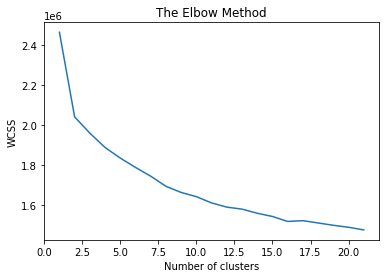

In [226]:
plt.plot(range(1, 42), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [255]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)


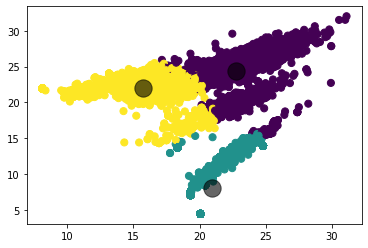

In [256]:
plt.scatter(y_kmeans[: ,0], y_kmeans[: ,1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

0
0
0
1


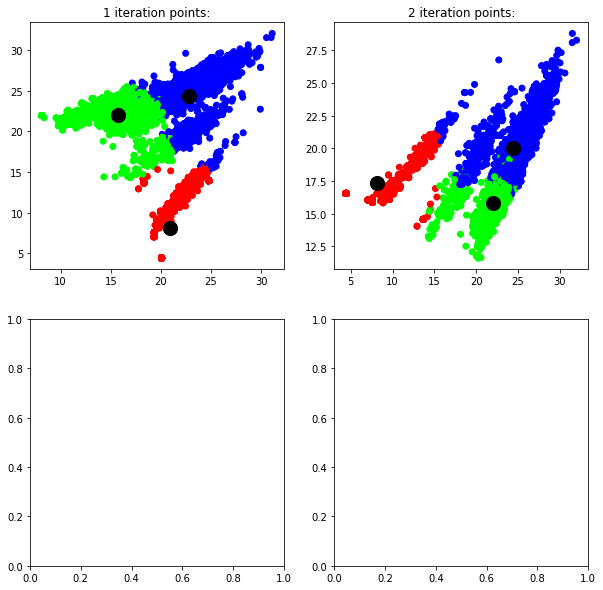

In [258]:
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    print(c)
    print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [259]:
cluster_dataset['CLUSTERS'] = kmeans.labels_
cluster_dataset.to_csv("cluster_sum_glove_vectors.csv",index=False)

In [260]:
cluster_dataset = cluster_dataset[['Top_Words', 'CLUSTERS']]
cluster_dataset

,Top_Words,CLUSTERS
0,grow,1
1,thing,1
2,would like planes,2
3,would like see,2
4,keep trend,2
...,...,...
8209,im sure,0
8210,see,1
8211,like moving forward,2
8212,great think play,2


In [261]:
cluster_dataset.to_csv("cluster_firstn_glove_vectors.csv",index=False)

In [262]:
cluster_dataset.sort_values('CLUSTERS')

,Top_Words,CLUSTERS
4106,lot pride company,0
2675,seen firm past,0
5861,fear asi may,0
5860,sex ed,0
2680,seams try keep,0
...,...,...
6425,sorry say think,2
1864,like way industry,2
1863,would like see,2
5078,feel like care,2


In [263]:
cluster_dataset['Top_Words']=cluster_dataset['Top_Words'].str.replace(r'blank',' ')

CLUSTER no.0


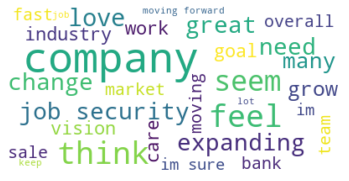

CLUSTER no.1


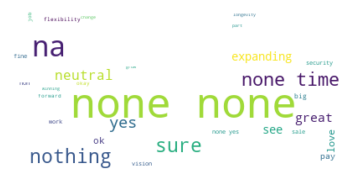

CLUSTER no.2


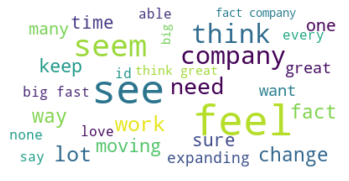

In [265]:
for i in range(0,3):
    word=" ".join(word for word in (cluster_dataset[cluster_dataset['CLUSTERS']==i].Top_Words.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


In [300]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['CLUSTERS']==0].Top_Words).split()


count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

count



{'unclear': 5,
 'rd': 4,
 'fits': 3,
 'fair': 2,
 'equitable': 2,
 'pay': 50,
 'flexibility': 10,
 'tools': 3,
 'work': 83,
 'would': 34,
 'say': 8,
 'degree': 5,
 'promote': 8,
 'within': 27,
 'help': 21,
 'changes': 80,
 'made': 25,
 'derogatory': 1,
 'home': 9,
 'policy': 6,
 'seem': 40,
 'care': 46,
 'grow': 100,
 'act': 4,
 'like': 333,
 'speak': 5,
 'flexible': 12,
 'options': 12,
 'able': 24,
 'study': 1,
 'done': 9,
 'following': 17,
 'time': 29,
 'im': 122,
 'worried': 44,
 'hire': 15,
 'company': 430,
 'think': 187,
 'low': 19,
 'lbs': 2,
 'door': 8,
 'feel': 158,
 'downward': 3,
 'mb': 7,
 'needs': 54,
 'return': 3,
 'love': 107,
 'dc': 3,
 'dm': 2,
 'great': 125,
 'leader': 61,
 'seems': 118,
 'late': 5,
 'main': 4,
 'parking': 5,
 'nurse': 2,
 'stop': 8,
 'want': 13,
 'see': 32,
 'cg': 1,
 'alliance': 2,
 'overall': 54,
 'split': 5,
 'non': 6,
 'sales': 43,
 '3': 1,
 'week': 1,
 'develop': 7,
 'research': 15,
 'team': 58,
 'zoo': 2,
 'one': 42,
 'top': 54,
 'cost': 8,
 'dr

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

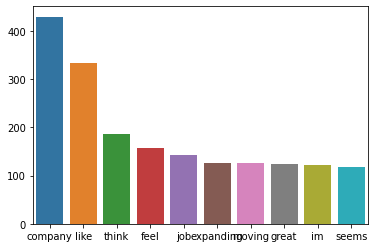

In [299]:
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
sns.barplot(list(TW.keys()), list(TW.values()))

In [291]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['CLUSTERS']==1].Top_Words).split()

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)


count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count


{'grow': 4,
 'thing': 1,
 'sure': 123,
 'none': 1446,
 'na': 332,
 'see': 42,
 'secure': 2,
 'nothing': 122,
 'china': 3,
 'non': 10,
 'actually': 1,
 'matter': 1,
 'input': 2,
 'pay': 19,
 'neutral': 57,
 'balance': 1,
 'changes': 2,
 'time': 114,
 'aware': 2,
 'change': 2,
 'sales': 9,
 'okay': 6,
 'exit': 1,
 'branding': 3,
 'job': 6,
 'wrong': 3,
 'read': 1,
 'q': 1,
 'date': 1,
 'paperwork': 2,
 'sap': 1,
 'longevity': 4,
 'cheap': 1,
 'let': 2,
 'ditto': 1,
 'idea': 3,
 'far': 1,
 'drowning': 1,
 'trust': 2,
 'big': 13,
 'sold': 3,
 'lean': 2,
 'size': 2,
 'division': 1,
 'work': 8,
 'yes': 90,
 'amp': 1,
 'noted': 1,
 'page': 1,
 'sorry': 1,
 'greed': 1,
 'fast': 2,
 'amazing': 3,
 'engage': 1,
 'fun': 2,
 'trends': 1,
 'yet': 2,
 'great': 52,
 'pass': 3,
 'k': 1,
 'ok': 23,
 'hope': 2,
 'expanding': 46,
 'forward': 6,
 'top': 3,
 'challenging': 3,
 'fine': 9,
 'green': 1,
 'love': 29,
 'security': 9,
 'like': 21,
 'nuance': 1,
 'real': 1,
 'unity': 1,
 'winning': 4,
 'way': 3,


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

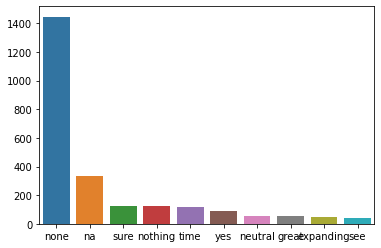

In [292]:
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
sns.barplot(list(TW.keys()), list(TW.values()))

In [293]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['CLUSTERS']==2].Top_Words).split()

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)


count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count


{'would': 413,
 'like': 1188,
 'planes': 1,
 'see': 448,
 'keep': 72,
 'trend': 4,
 'bottom': 3,
 'need': 126,
 'try': 16,
 'retain': 2,
 'loved': 1,
 'look': 19,
 'id': 35,
 'feels': 74,
 'changes': 82,
 'longer': 10,
 'care': 11,
 'love': 46,
 'us': 26,
 'seems': 186,
 'name': 5,
 'feel': 396,
 'salon': 1,
 'may': 21,
 'mc': 1,
 'say': 34,
 'want': 57,
 'move': 36,
 'ever': 9,
 'since': 6,
 'last': 7,
 'change': 65,
 'sales': 8,
 'push': 17,
 'short': 9,
 'time': 75,
 'seen': 13,
 'robust': 1,
 'work': 117,
 'life': 20,
 'balance': 24,
 'moving': 136,
 'forward': 43,
 'nice': 9,
 'call': 3,
 'none': 32,
 'think': 210,
 'many': 77,
 'stop': 15,
 'company': 170,
 'horizontal': 1,
 'put': 22,
 'hard': 18,
 'hold': 1,
 'lot': 120,
 'maybe': 6,
 'fast': 58,
 'get': 62,
 'away': 20,
 'data': 3,
 'mason': 1,
 'general': 2,
 'pay': 11,
 'expand': 7,
 'bringing': 7,
 'sure': 69,
 'nothing': 28,
 'talking': 2,
 'clear': 23,
 'dealer': 1,
 'willing': 20,
 'truly': 14,
 'first': 18,
 'bank': 9,


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

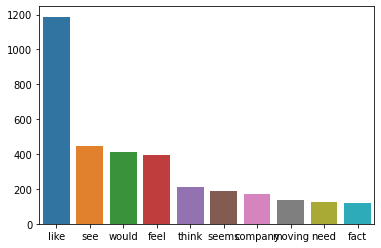

In [294]:
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
sns.barplot(list(TW.keys()), list(TW.values()))

In [301]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['CLUSTERS']==2].Top_Words).split()


count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

count



{'would': 413,
 'like': 1188,
 'planes': 1,
 'see': 448,
 'keep': 72,
 'trend': 4,
 'bottom': 3,
 'need': 126,
 'try': 16,
 'retain': 2,
 'loved': 1,
 'look': 19,
 'id': 35,
 'feels': 74,
 'changes': 82,
 'longer': 10,
 'care': 11,
 'love': 46,
 'us': 26,
 'seems': 186,
 'name': 5,
 'feel': 396,
 'salon': 1,
 'may': 21,
 'mc': 1,
 'say': 34,
 'want': 57,
 'move': 36,
 'ever': 9,
 'since': 6,
 'last': 7,
 'change': 65,
 'sales': 8,
 'push': 17,
 'short': 9,
 'time': 75,
 'seen': 13,
 'robust': 1,
 'work': 117,
 'life': 20,
 'balance': 24,
 'moving': 136,
 'forward': 43,
 'nice': 9,
 'call': 3,
 'none': 32,
 'think': 210,
 'many': 77,
 'stop': 15,
 'company': 170,
 'horizontal': 1,
 'put': 22,
 'hard': 18,
 'hold': 1,
 'lot': 120,
 'maybe': 6,
 'fast': 58,
 'get': 62,
 'away': 20,
 'data': 3,
 'mason': 1,
 'general': 2,
 'pay': 11,
 'expand': 7,
 'bringing': 7,
 'sure': 69,
 'nothing': 28,
 'talking': 2,
 'clear': 23,
 'dealer': 1,
 'willing': 20,
 'truly': 14,
 'first': 18,
 'bank': 9,


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

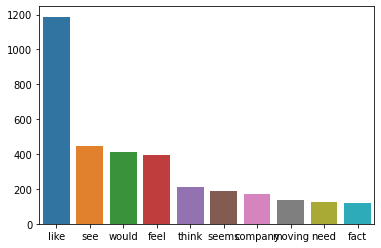

In [302]:
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
sns.barplot(list(TW.keys()), list(TW.values()))

# KMeans Using Unique Words in GLOVE

In [109]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df.iloc[:, 1:])

In [114]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 19

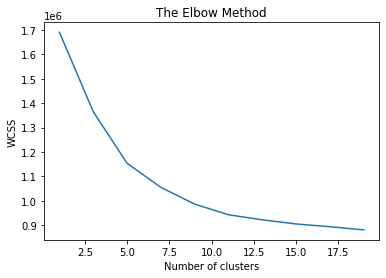

In [117]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

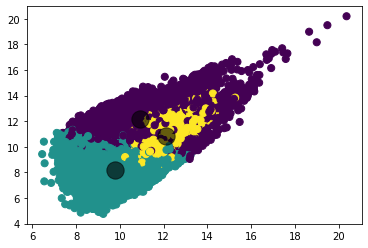

In [118]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


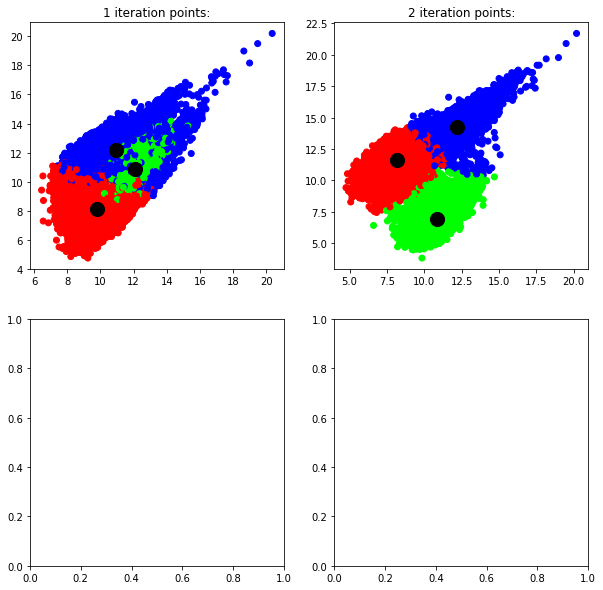

In [119]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [120]:
df['CLUSTERS'] = kmeans.labels_
df.to_csv("cluster_glove_vector.csv",index=False)

In [121]:
df

,glove_words,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,created,-0.503497,0.730933,0.660870,-0.263811,-0.491909,-0.309195,-0.688478,0.462472,-0.760211,...,-0.288894,-0.583208,2.884658,-0.062130,1.598386,-1.523864,0.353237,-0.219901,-0.310191,2
1,canceling,-1.212124,-0.419334,-0.707557,2.367106,0.289184,-0.447826,0.774561,0.606645,-0.343370,...,-0.324980,-0.473685,1.264393,-0.303549,-0.516578,-0.806594,0.473598,1.754933,-0.212254,2
2,specialties,-0.890932,-0.577434,-0.111191,0.213541,-0.207109,-0.130149,-0.356862,1.048758,-0.512216,...,-0.187845,-0.157787,-0.439836,0.442621,-0.298659,0.310787,0.234899,0.111625,0.109608,1
3,enthusiasm,-0.322571,-0.617406,0.186944,0.715360,-0.003223,1.237303,0.389045,-0.171112,0.010284,...,-0.595616,0.052005,-0.163519,-0.638041,-0.179100,0.473116,-0.189884,1.693653,0.030356,0
4,streamed,-0.101834,0.144977,0.838483,0.130689,0.143541,0.010029,-0.534487,0.781276,-0.353726,...,-0.159851,-0.317230,2.312287,-0.397244,0.899872,-1.824215,0.070210,0.164813,-0.478515,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17607,america,1.309899,-1.122617,0.563742,-0.207353,-0.483358,-1.256061,-0.446236,0.063477,0.031453,...,0.225566,-0.324486,0.265056,-0.392512,-0.109882,-1.077009,0.055145,0.979706,0.756228,0
17608,patron,-0.357138,-0.590891,0.397272,0.181995,-1.119347,-0.401659,-0.902193,-0.335233,-0.524238,...,0.042078,-1.056159,0.017162,-0.641281,0.091986,-0.533366,0.155598,0.796546,0.111048,0
17609,bumped,-0.853348,0.033586,0.597215,-0.212068,-0.576770,-0.374371,-0.489731,-0.564087,-0.611204,...,-0.060097,-0.176661,3.040165,-0.239043,1.132518,-1.287471,0.106031,0.488397,-0.446215,2
17610,start,-0.301044,-0.264799,0.034484,0.452961,0.444688,-0.021038,0.589510,0.723543,-0.463509,...,-0.250631,-0.881867,1.960290,-1.262158,-0.180095,-0.528658,-0.207148,0.330752,0.074464,0


In [123]:
dfs = df[['glove_words', 'CLUSTERS']].copy()
dfs.sort_values('CLUSTERS')

,glove_words,CLUSTERS
13323,reality,0
6265,bruce,0
6263,yellow,0
10871,motto,0
15530,sheet,0
...,...,...
8816,obliterated,2
8814,apologizing,2
8811,managing,2
8861,leaner,2


In [124]:
dfs.to_csv("cluster_count_vector.csv",index=False)

CLUSTER no.0


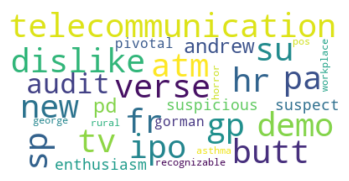

CLUSTER no.1


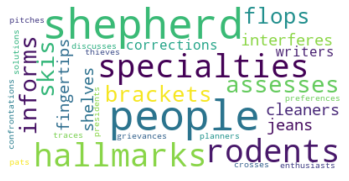

CLUSTER no.2


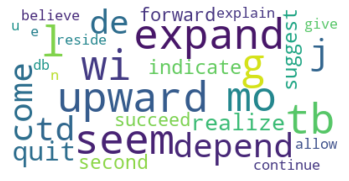

In [126]:
for i in range(0,3):
    word=" ".join(word for word in (dfs[dfs['CLUSTERS']==i].glove_words.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


In [164]:
data0 = dfs[dfs['CLUSTERS'] == 0]
len(data0)

8747

In [160]:
data1 = dfs[dfs['CLUSTERS'] == 1]
len(data1)

3185

In [159]:
data2 = dfs[dfs['CLUSTERS'] == 2]
len(data2)

5680

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x=dfs.glove_words[:10], hue=dfs.CLUSTERS)
plt.show()

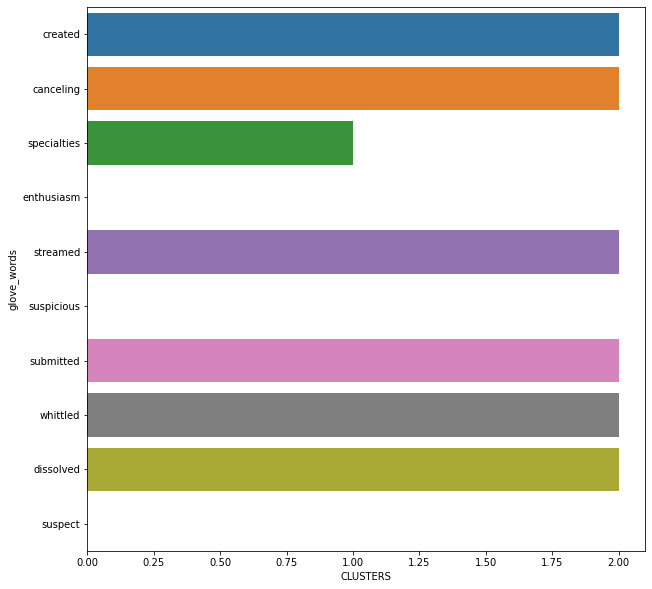

In [163]:
fig = plt.figure(figsize=(10,10))
sns.barplot(y=dfs.glove_words[:10], x=dfs.CLUSTERS)
plt.show()

## KMeans Using Adjective in Cluster_dataset

In [197]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df1.iloc[:, 1:])

/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [198]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 14

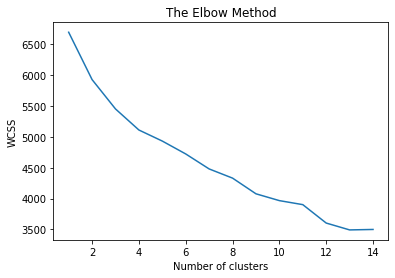

In [199]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

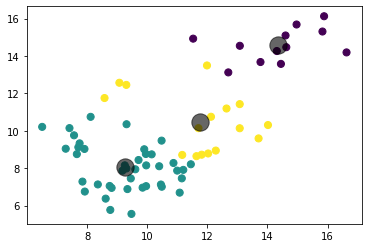

In [200]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


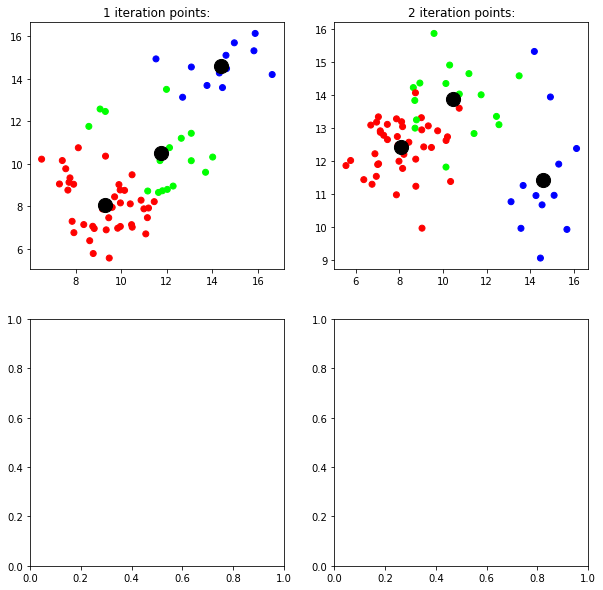

In [201]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [174]:
df1['CLUSTERS'] = kmeans.labels_
df1.to_csv("cluster_adj_vector.csv",index=False)

In [175]:
df1

,Adjectives,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,open,-0.977751,0.450361,0.311777,0.502981,-0.416487,-0.342204,-0.498896,-0.020836,0.242185,...,-0.752667,-0.727123,0.123692,1.032662,-0.705267,-0.009354,-0.346997,1.381424,0.669390,1
1,fine,-1.141763,0.097163,0.193496,1.274481,-0.471860,-0.395376,-0.575648,-0.268563,-0.023695,...,-0.461944,-0.908788,0.744177,-0.167827,0.273547,0.022713,0.164489,1.461831,0.129008,1
2,unable,-0.424375,0.456033,0.599332,0.468204,-1.003004,-0.046024,-0.672989,-0.083031,-0.356904,...,-1.179146,-0.629005,1.588920,3.305562,0.272415,0.264923,-0.787347,0.905633,0.098126,2
3,clean,-0.110839,-0.557962,1.213613,0.601712,-0.288371,-1.042449,-0.118347,0.562972,-0.097732,...,-0.435590,-0.580549,0.112736,1.217030,-0.355601,-0.141285,-0.190465,0.862478,0.577818,1
4,main,-0.980937,-0.200368,-0.167151,1.016810,-0.242019,0.003217,-0.076014,0.609795,-0.119386,...,-0.509876,-0.552285,-0.830008,0.429013,-0.136752,0.985167,0.371235,1.003044,-0.620460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,comparable,-1.196768,0.693993,0.279096,0.789539,-0.566691,-0.369107,-0.624129,0.206025,-0.408476,...,-1.132530,-1.284879,0.626667,1.737763,0.459846,0.469557,0.000026,1.490333,0.556421,1
65,flexible,-0.880958,0.784350,0.690391,0.277109,-0.015996,-0.802653,-0.483870,0.576329,-0.053634,...,-0.246215,-0.585211,1.030226,1.169892,0.090002,0.717403,0.486143,1.222012,0.030340,1
66,loyal,-1.215091,0.419306,0.117987,0.548706,-0.727027,-0.229508,-0.124458,1.147563,0.010925,...,-0.920778,-1.061577,-0.257609,1.115807,-0.017359,0.250116,0.026867,1.715673,-0.581786,1
67,big,-1.238271,0.425498,0.483317,0.067880,0.084602,-0.155673,-0.024506,0.473645,-0.243151,...,-0.434639,-0.261002,0.109186,1.605072,-0.363820,-0.231383,0.000838,0.901054,-0.099728,1


In [176]:
dfs = df1[['Adjectives', 'CLUSTERS']].copy()
dfs.sort_values('CLUSTERS')

,Adjectives,CLUSTERS
8,non,0
30,"394,say",0
19,"780,na",0
28,"90,return",0
40,mean,0
...,...,...
31,last,2
36,many,2
35,lengthy,2
9,worried,2


In [177]:
dfs.to_csv("cluster_adj_vector.csv",index=False)

CLUSTER no.0


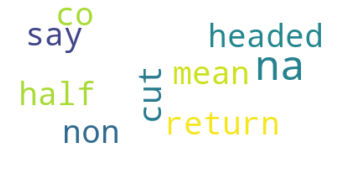

CLUSTER no.1


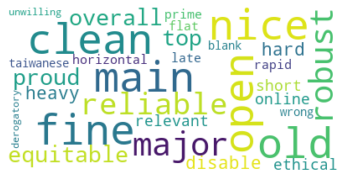

CLUSTER no.2


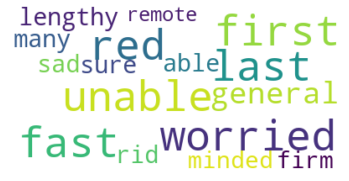

In [179]:
for i in range(0,3):
    word=" ".join(word for word in (dfs[dfs['CLUSTERS']==i].Adjectives.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


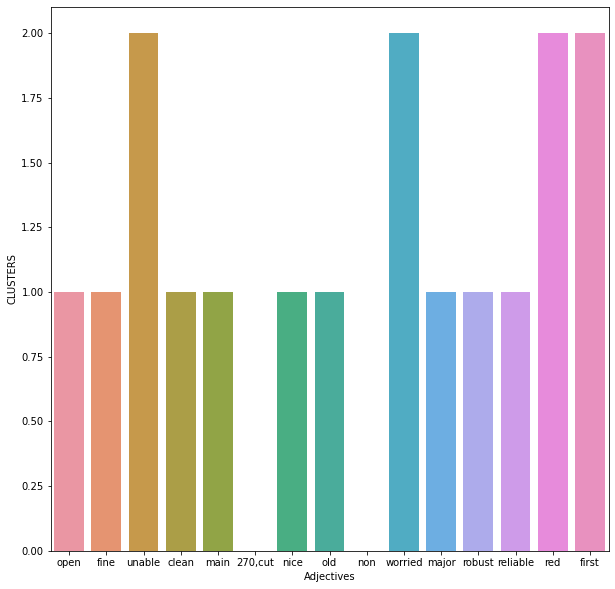

In [185]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dfs.Adjectives[:15], y=dfs.CLUSTERS)
plt.show()

## KMeans Using Noun in Cluster_dataset

In [202]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df2.iloc[:, 1:])

In [204]:
wcss = []
for i in range(1, 17):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 16

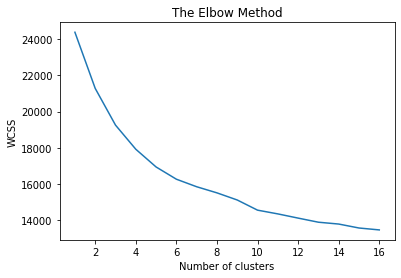

In [206]:
plt.plot(range(1, 17), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

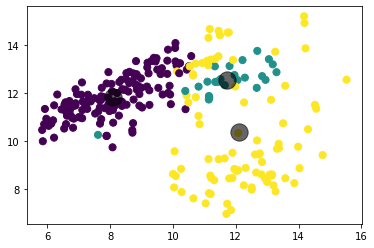

In [207]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


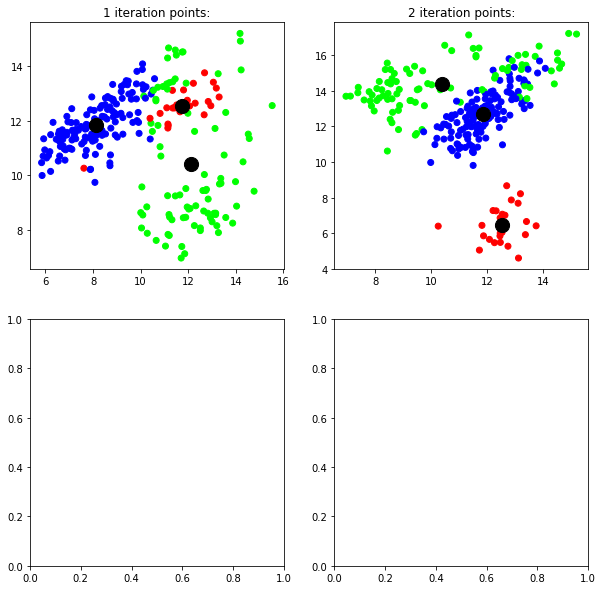

In [208]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [212]:
df2['CLUSTERS'] = kmeans.labels_
df2.to_csv("cluster_nouns_vector.csv",index=False)

In [213]:
df2

,Nouns,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,"686,ki",-1.300084,-0.450791,-0.178391,0.699332,0.481616,-0.600484,-0.580457,1.197778,-0.610617,...,0.748591,-0.689773,0.496651,-0.460986,-0.614935,0.337827,0.768780,0.794774,-0.373484,1
1,open,-0.977751,0.450361,0.311777,0.502981,-0.416487,-0.342204,-0.498896,-0.020836,0.242185,...,-0.752667,-0.727123,0.123692,1.032662,-0.705267,-0.009354,-0.346997,1.381424,0.669390,0
2,"882,pay",-0.353933,-1.156838,-0.047494,0.643110,0.473321,-0.582492,0.285215,1.400913,-0.434450,...,1.238512,-0.527426,0.548551,-0.928738,-0.704387,0.478053,-0.166329,0.722126,0.524727,1
3,division,-0.712482,0.139110,0.901719,0.470820,-0.626965,0.095966,-0.056308,0.289556,-0.408028,...,-0.057193,-0.735532,-0.087704,-0.623377,0.090493,-0.695466,0.208805,1.128271,-0.044310,0
4,salon,1.006009,-0.799629,0.655507,0.402878,0.573304,-0.036616,-1.010456,0.692494,-0.447354,...,-0.335300,-0.441864,-0.451181,-1.367279,-1.056107,-1.156440,0.842152,1.824739,-0.365864,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,"87,feel",-0.658456,-0.658689,-0.645674,1.957597,-0.563642,0.243485,-0.517972,0.316688,-0.204259,...,1.611837,0.293757,-0.300850,-0.573755,-0.716398,0.103030,-0.458029,0.732219,0.284644,1
250,area,-0.385374,-0.559624,0.781490,1.030559,-0.142535,0.370449,-1.060411,0.060852,-0.153388,...,0.667226,-1.324050,0.409127,-0.865889,-0.189153,-0.717901,-0.249168,1.217439,0.350139,0
251,pipeline,-0.402022,-0.355750,0.169803,0.399330,0.401064,0.138470,0.196738,0.414617,-0.258171,...,0.377889,-1.095871,0.190925,-1.706813,-0.233482,-0.829828,-0.071075,0.365938,0.223378,0
252,"84,seems",-1.142360,-1.116977,0.061702,1.573527,-0.489738,-1.247054,-1.356434,1.277850,-0.837940,...,0.931779,-0.173841,-1.006851,0.101304,-0.150204,-1.388727,0.507570,-0.077581,1.318611,1


In [221]:
dfs2 = df2[['Nouns', 'CLUSTERS']].copy()
dfs2.sort_values('CLUSTERS')

,Nouns,CLUSTERS
126,guidance,0
141,hill,0
142,lull,0
143,scale,0
146,disability,0
...,...,...
69,sales,2
119,problems,2
70,sizes,2
18,options,2


In [222]:
dfs2.to_csv("cluster_nouns_vector.csv",index=False)

CLUSTER no.0


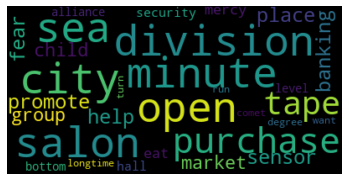

CLUSTER no.1


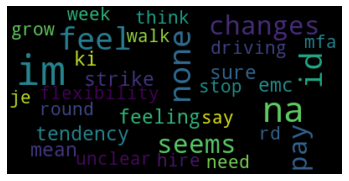

CLUSTER no.2


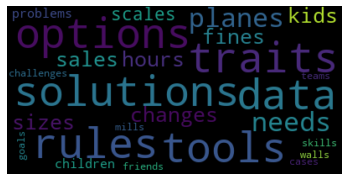

In [225]:
for i in range(0,3):
    word=" ".join(word for word in (dfs2[dfs2['CLUSTERS']==i].Nouns.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


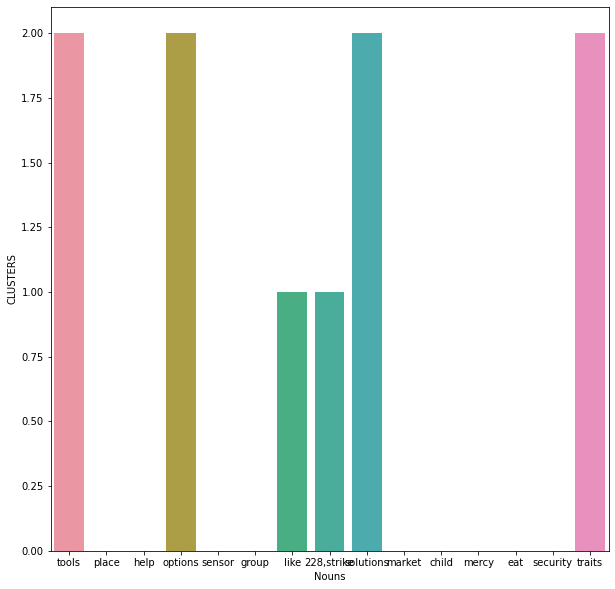

In [240]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dfs2.Nouns[15:30], y=dfs2.CLUSTERS)
plt.show()

## KMeans Using Verb in Cluster_dataset

In [241]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df3.iloc[:, 1:])

In [242]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 18

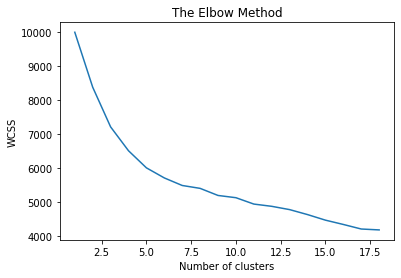

In [243]:
plt.plot(range(1, 19), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

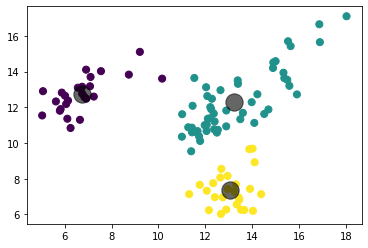

In [244]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


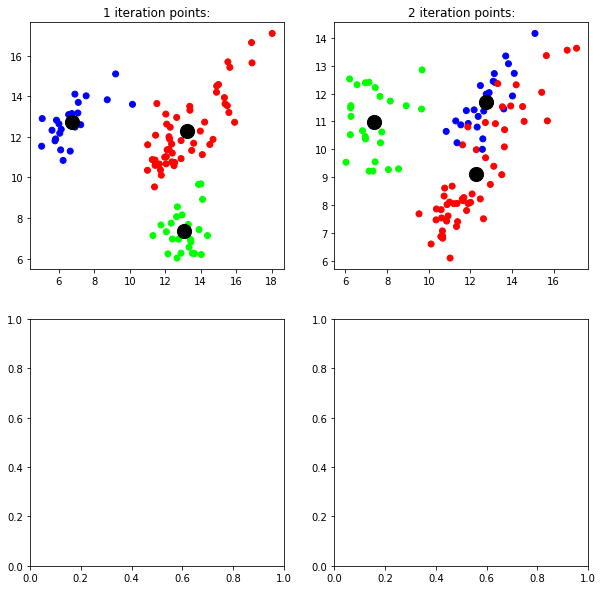

In [245]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [246]:
df3['CLUSTERS'] = kmeans.labels_
df3.to_csv("cluster_verb_vector.csv",index=False)

In [247]:
df3

,Verbs,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,investing,-1.209313,-0.479795,-0.729919,2.710852,0.752120,-0.544674,0.872824,0.589095,0.197553,...,0.247826,-0.889845,0.196562,-0.626773,-0.979546,-0.885873,-0.070796,2.438084,0.377256,2
1,go,-0.189587,-0.717896,-0.302657,0.173293,0.907189,0.540936,0.754562,1.559487,-0.984894,...,0.684350,-0.569666,1.681061,-1.069817,-0.672444,-0.272679,0.137140,0.119429,0.654477,0
2,promote,-0.220043,0.404879,-0.139304,1.649640,-0.133818,-0.402233,1.344918,0.294594,-0.823015,...,-0.189232,-0.262026,2.633523,-0.561715,-0.223749,-0.490227,-0.044408,-0.316962,-0.108466,0
3,wants,-0.410724,-0.382438,0.405273,0.870250,-1.031396,-0.453106,-0.808992,1.070017,-0.638662,...,-0.084268,0.233029,2.304921,-0.101465,0.221792,-0.927225,-0.201377,-0.625855,0.913326,0
4,help,0.159435,-0.586954,0.463968,1.122169,0.096702,-0.227069,0.868279,1.182435,-0.353390,...,0.033172,-0.133994,0.378407,-1.072431,-1.179990,-0.836448,0.142997,0.683608,0.678758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,seen,-0.498544,-0.985434,1.061363,1.002778,-0.303872,-0.122840,-0.852680,0.418492,-0.596817,...,-1.075393,-0.700088,2.226555,0.223194,0.407726,-1.383953,0.659232,-0.104889,-0.253122,1
100,eliminate,-0.222155,-0.395993,-0.261156,0.928726,0.872220,-0.023964,-0.598552,0.412073,-0.569363,...,0.120924,-0.867344,1.302259,-1.829572,-0.518653,-0.563926,-0.379824,0.371463,0.853836,0
101,"76,would",-0.485589,-0.905230,0.420505,2.259968,-0.925728,-0.892305,-1.472507,1.214932,-1.378869,...,0.065067,0.206485,-0.978484,0.188544,-0.848724,-0.818853,-0.327391,0.962557,0.230537,0
102,sinking,-1.391043,-0.058936,-0.489767,1.452103,0.989291,-0.125013,0.350151,0.746044,-0.124008,...,-0.342444,-0.747886,1.117464,0.368616,-0.044350,-1.038813,0.367522,1.689593,-0.784611,2


In [248]:
dfs3 = df3[['Verbs', 'CLUSTERS']].copy()
dfs3.sort_values('CLUSTERS')

,Verbs,CLUSTERS
78,reps,0
30,"69,say",0
31,feels,0
65,add,0
33,m,0
...,...,...
61,adding,2
68,heading,2
69,learning,2
73,turning,2


In [250]:
dfs3.to_csv("cluster_verb_vector.csv",index=False)

CLUSTER no.0


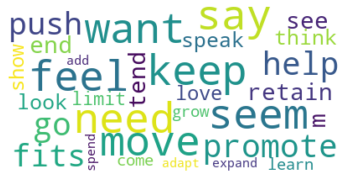

CLUSTER no.1


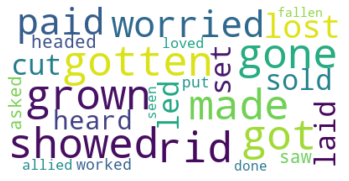

CLUSTER no.2


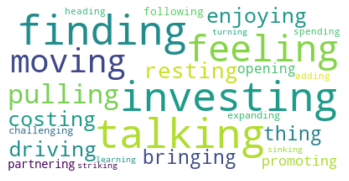

In [252]:
for i in range(0,3):
    word=" ".join(word for word in (dfs3[dfs3['CLUSTERS']==i].Verbs.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


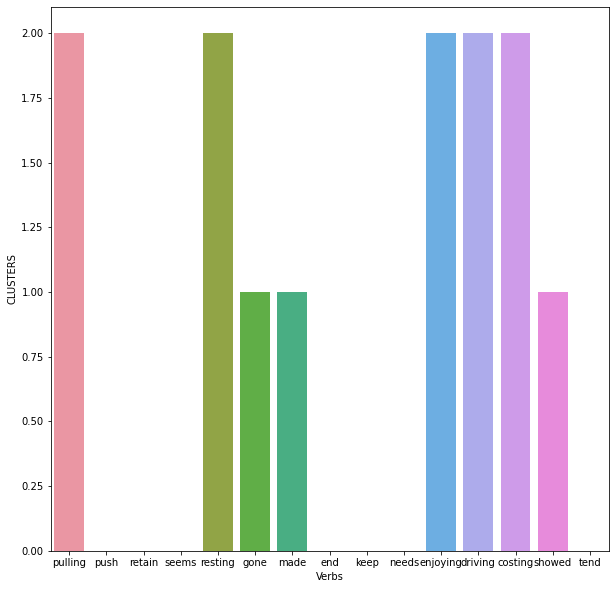

In [253]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dfs3.Verbs[15:30], y=dfs3.CLUSTERS)
plt.show()

## KMeans Using Adverb in Cluster_dataset

In [254]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df4.iloc[:, 1:])

In [255]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 20

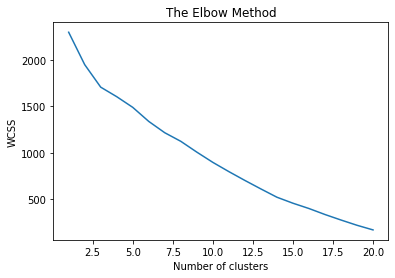

In [256]:
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

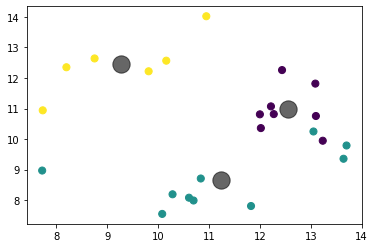

In [257]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


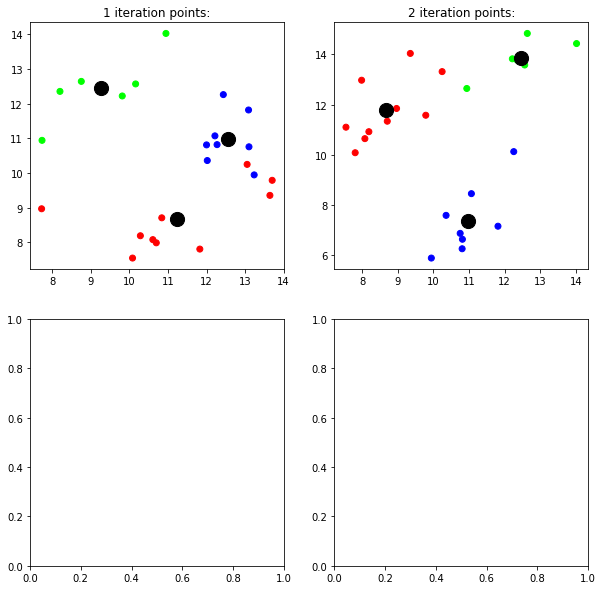

In [258]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [259]:
df4['CLUSTERS'] = kmeans.labels_
df4.to_csv("cluster_adverb_vector.csv",index=False)

In [260]:
df4

,Adverbs,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,maybe,-0.227702,-0.542461,-0.195909,0.446321,0.333743,-0.641477,-0.633941,0.613967,-0.103240,...,0.207833,-0.388433,-1.557736,0.374643,0.995117,-0.438085,0.205949,0.742986,1.083706,0
1,generally,-0.572391,-0.337941,0.775276,-0.050434,0.302686,-0.188438,-0.507704,0.265033,0.471836,...,0.113597,-0.335183,-0.837334,0.965576,1.013675,-0.543059,-0.246538,1.478728,-0.481110,0
2,even,-0.866571,-0.074175,-0.056179,1.023706,0.478381,-0.488132,-0.005320,0.218719,-0.524163,...,-0.127916,0.503171,-1.348384,0.066142,0.486077,-0.581939,-0.215774,1.579163,0.007938,1
3,first,-1.306101,-0.978577,0.533409,1.190963,-0.591567,-0.971074,-0.116281,0.528210,0.122042,...,-0.683029,-0.133636,0.432591,1.072847,0.306252,-0.598414,0.776492,0.008385,0.765018,1
4,fast,-0.731581,-0.722720,0.455772,0.782458,0.865686,-0.007708,-0.257573,-0.258572,-0.273704,...,-0.439142,-0.536210,0.445555,-0.240309,0.245909,-0.497702,0.825662,1.024495,-0.166849,1
5,fairly,0.451929,-1.442848,-0.074423,0.183856,-0.068977,0.210087,-0.847743,-0.050662,-0.678566,...,-0.773527,0.079649,-0.178485,-0.591710,0.592628,-1.126885,0.200648,1.384418,1.439658,1
6,yet,-0.105645,-0.798997,-0.223543,-0.051081,1.102245,-0.787460,-0.198651,-0.057636,-1.104697,...,0.595840,0.171115,-0.141234,-0.557797,1.077298,0.073235,-0.007062,1.184775,0.419796,0
7,downward,-1.078024,-0.738853,0.182435,0.573794,-0.204364,-0.037709,-1.117518,0.427100,0.021557,...,-0.507698,-0.296101,-0.099544,-0.718364,0.278764,-0.941749,0.193671,1.722052,0.422885,2
8,genuinely,-0.352855,-1.070110,0.582488,0.873374,-0.147459,0.198462,-0.756439,0.250893,0.115687,...,-0.577845,-0.485213,-1.177906,0.738785,0.545273,-1.121971,-0.095990,1.751145,0.662104,0
9,pretty,-0.440453,-2.011667,0.012406,0.737733,-0.338932,-0.039096,-0.400970,-0.000748,-0.374119,...,-0.429578,0.331476,0.307878,0.309541,-0.222837,-0.996071,-0.080600,1.086357,-0.446866,1


In [262]:
dfs4 = df4[['Adverbs', 'CLUSTERS']].copy()
dfs4.sort_values('CLUSTERS')

,Adverbs,CLUSTERS
0,maybe,0
21,lately,0
13,truly,0
12,anymore,0
8,genuinely,0
6,yet,0
11,actually,0
1,generally,0
23,long,1
4,fast,1


In [263]:
dfs4.to_csv("cluster_adverb_vector.csv",index=False)

CLUSTER no.0


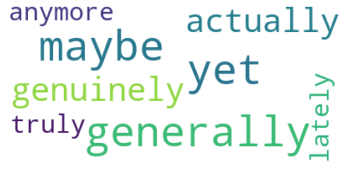

CLUSTER no.1


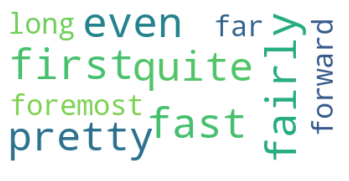

CLUSTER no.2


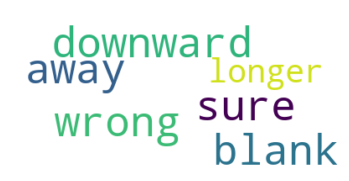

In [265]:
for i in range(0,3):
    word=" ".join(word for word in (dfs4[dfs4['CLUSTERS']==i].Adverbs.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


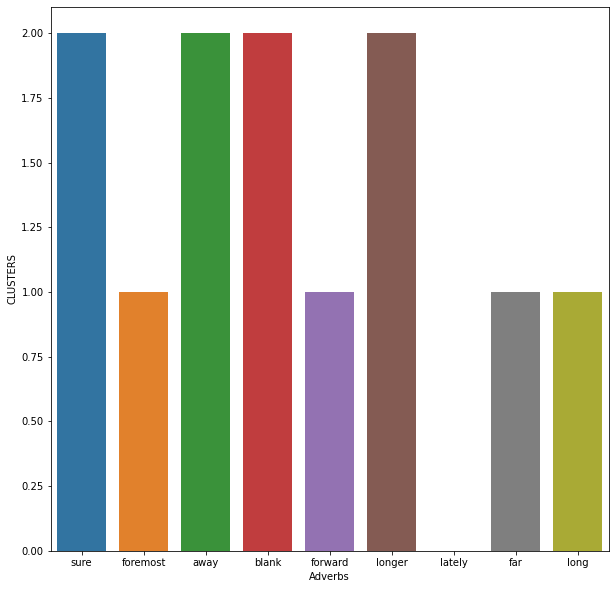

In [266]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dfs4.Adverbs[15:30], y=dfs4.CLUSTERS)
plt.show()

# Feature Extraction Using TF-IDF

In [267]:
vec = TfidfVectorizer(stop_words='english')
matrix = vec.fit_transform(data['COMMENT'][:1000])
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df = idf_df.T
idf_df


/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
abilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abilityphysically,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abilityskillswant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
鈥淴鈥,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
idf_df.reset_index(level=0, inplace=True)
idf_df

,index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,abilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abilityphysically,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abilityskillswant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,yrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3944,yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3945,zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3946,鈥淴鈥,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
idf_df.rename({'index': 'Words'}, axis=1, inplace=True)
idf_df

,Words,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,abilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abilityphysically,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abilityskillswant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,yrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3944,yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3945,zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3946,鈥淴鈥,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
idf_df = idf_df[idf_df['Words'].map(lambda x: x.isascii())]

In [272]:
idf_df

,Words,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,abilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abilityphysically,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abilityskillswant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,youngest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3942,youre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3943,yrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3944,yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KMeans Using TF-IDF

In [273]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(idf_df.iloc[:, 1:])

In [274]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 19

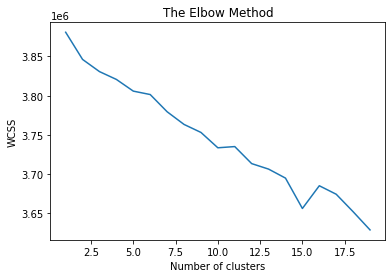

In [275]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

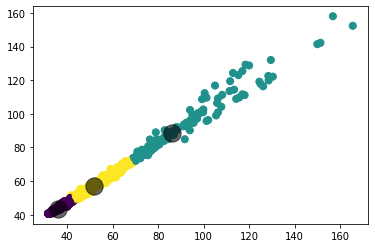

In [276]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


0
0
0
1


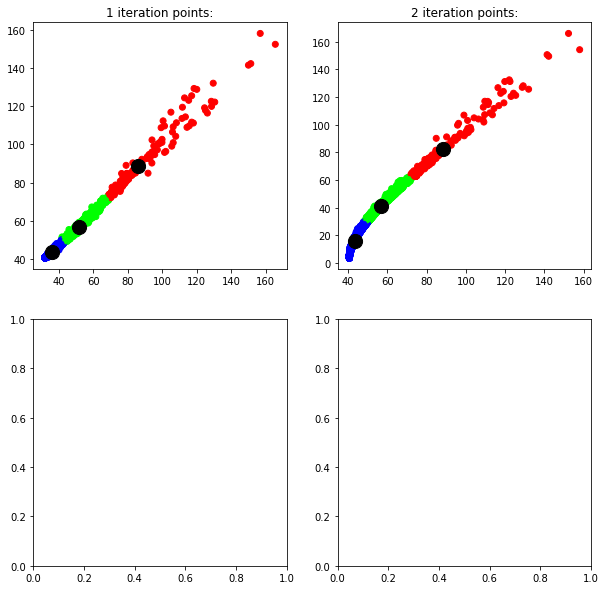

In [277]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    print(c)
    print(d)
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [278]:
idf_df['CLUSTERS'] = kmeans.labels_
idf_df.to_csv("cluster_idf_vec.csv",index=False)

/tmp/ipykernel_16002/3087079884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['CLUSTERS'] = kmeans.labels_


In [279]:
idf_df

,Words,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,CLUSTERS
0,abilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,abilityphysically,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,abilityskillswant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,youngest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3942,youre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3943,yrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3944,yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [280]:
df = idf_df[['Words', 'CLUSTERS']]
df.sort_values('CLUSTERS')

,Words,CLUSTERS
3103,seasons,0
3279,speak,0
3280,special,0
919,details,0
1841,invest,0
...,...,...
1515,god,2
1516,goers,2
1519,gold,2
1499,genesys,2


In [281]:
df.to_csv("cluster_bert_embed.csv",index=False)

CLUSTER no.0


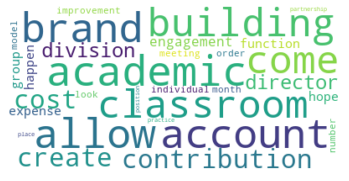

CLUSTER no.1


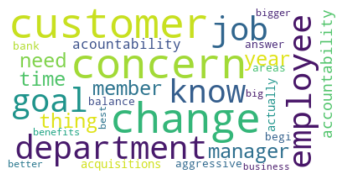

CLUSTER no.2


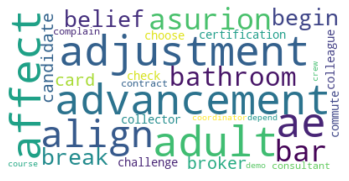

In [282]:
for i in range(0,3):
    word=" ".join(line for line in (df[df['CLUSTERS']==i].Words.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


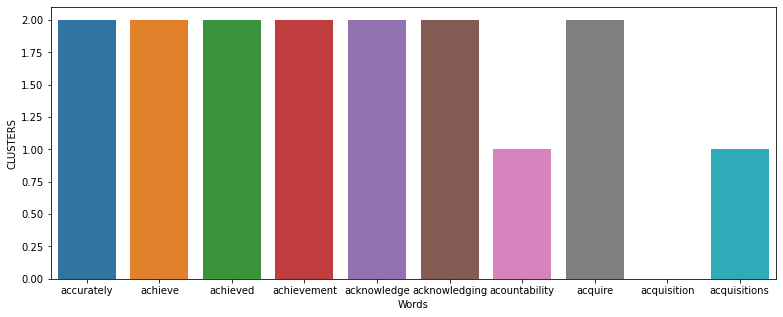

In [294]:
fig = plt.figure(figsize=(13,5))
sns.barplot(x=df.Words[35:45], y=df.CLUSTERS)
plt.show()